In [1]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from PIL import Image
import random
from tqdm import tqdm

In [2]:
# Load in dataset
data_dir = "/kaggle/input/mnist-in-csv"
train_df = pd.read_csv(f"{data_dir}/mnist_train.csv")
test_df = pd.read_csv(f"{data_dir}/mnist_test.csv")

train_df.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [3]:
# Create numpy array representing all training images
train_data = train_df.to_numpy()
np.random.shuffle(train_data)
print(train_data)

test_data = test_df.to_numpy()
np.random.shuffle(test_data)
print(test_data)

[[0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]]
[[4 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [4]:
# Separate image data from labels
X_train = train_data[:, 1:]
Y_train = train_data[:, 0]
print(X_train)

X_test = test_data[:, 1:]
Y_test = test_data[:, 0]
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
# Normalize data
X_train = X_train / 255
print(X_train)

X_test = X_test / 255
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
n, m = X_train.shape
output_size = 10
hidden_size = m // 3
print(m)
print(hidden_size)
print(output_size)
X_train.shape

784
261
10


(60000, 784)

In [7]:
# Define activation function for hidden layer
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    ds = sigmoid(Z)
    return ds * (1 - ds)

# Define probability function for output layer
def softmax(Z):
    exps = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    prob = exps / np.sum(exps, axis=1, keepdims=True)
    return prob

In [8]:
#Initialize weights and biases
def init_params():
    W1 = np.random.randn(m, hidden_size) * np.sqrt(2 / m)
    b1 = np.zeros(hidden_size)
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
    b2 = np.zeros(output_size)
    return W1, b1, W2, b2

In [9]:
# Define forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [10]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, output_size))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

In [11]:
# Define backward propagation
def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    batch_size = len(X)
    one_hot_Y = one_hot(Y)
   
    dZ2 = A2 - one_hot_Y
    dW2 = np.dot(A1.T, dZ2) / batch_size
    db2 = np.sum(dZ2, axis=0) / batch_size
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / batch_size
    db1 = np.sum(dZ1, axis=0) / batch_size 

    return dW1, db1, dW2, db2

In [12]:
def compute_accuracy(X_pred, Y):
    preds = np.argmax(X_pred, axis=1)
    accuracy = np.mean(preds == Y)
    return accuracy

def compute_cross_entropy_loss(X_pred, Y):
    M = len(Y)
    log_likelihood = -np.log(X_pred[range(M), Y])
    loss = np.sum(log_likelihood) / M
    return loss

In [13]:
def make_predictions(W1, b1, W2, b2, X_test, Y_test):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X_test)
    test_accuracy = compute_accuracy(A2, Y_test)
    return test_accuracy

In [14]:
def train(X, Y, learning_rate=0.01, batch_size=32, epochs=5):
    W1, b1, W2, b2 = init_params()
    train_loss_data = []
    for epoch in range(epochs):
        for batch_start in tqdm(range(0, len(X), batch_size)):
            batch_end = min(batch_start + batch_size, len(X))
            X_batch = X[batch_start:batch_end]
            Y_batch = Y[batch_start:batch_end]
            
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_batch)
            train_loss = compute_cross_entropy_loss(A2, Y_batch)
            accuracy = compute_accuracy(A2, Y_batch)
            dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X_batch, Y_batch)

            # Update weights and biases
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
            
            if (batch_start // batch_size) % 1 == 0:
                print(f"Batch {batch_start // batch_size}: Loss = {train_loss:.4f}, Accuracy = {accuracy:.4f}")

            train_loss_data.append(train_loss)

            plt.plot(train_loss_data)
            plt.show()
                
    return W1, b1, W2, b2

  0%|          | 0/235 [00:00<?, ?it/s]

Batch 0: Loss = 2.4379, Accuracy = 0.0977


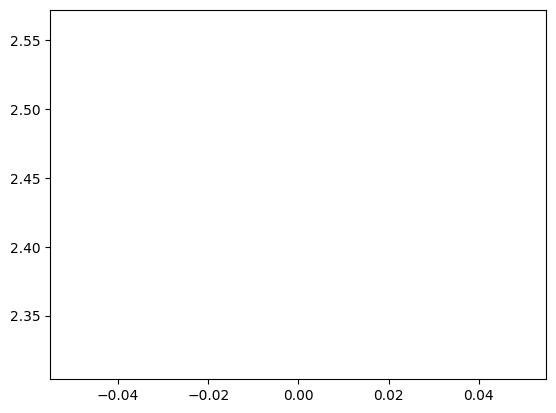

  0%|          | 1/235 [00:00<00:54,  4.30it/s]

Batch 1: Loss = 2.2622, Accuracy = 0.1680


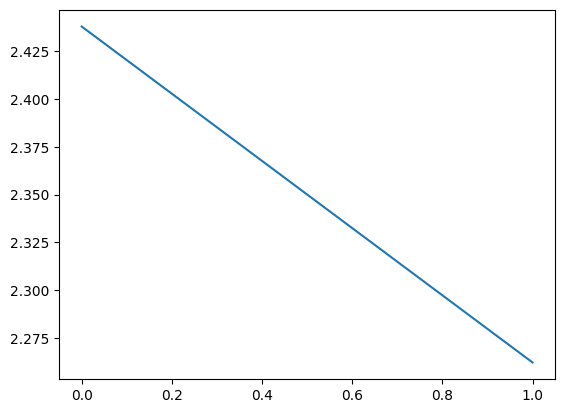

  1%|          | 2/235 [00:00<00:56,  4.16it/s]

Batch 2: Loss = 2.2597, Accuracy = 0.1758


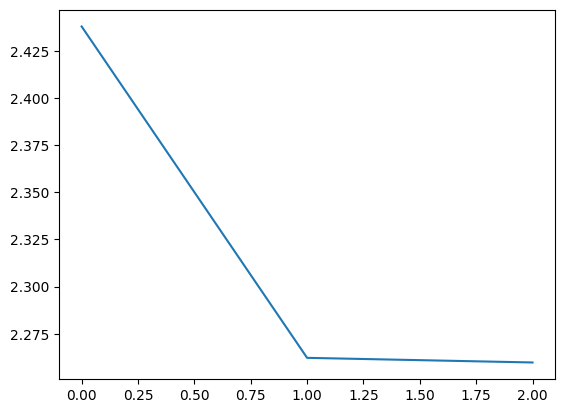

  1%|▏         | 3/235 [00:00<00:55,  4.17it/s]

Batch 3: Loss = 2.2355, Accuracy = 0.1836


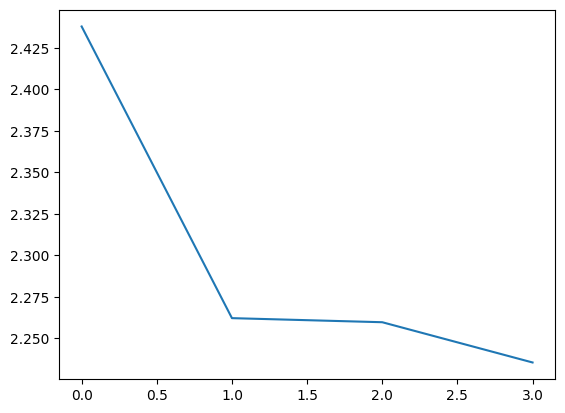

  2%|▏         | 4/235 [00:00<00:55,  4.13it/s]

Batch 4: Loss = 2.2309, Accuracy = 0.2695


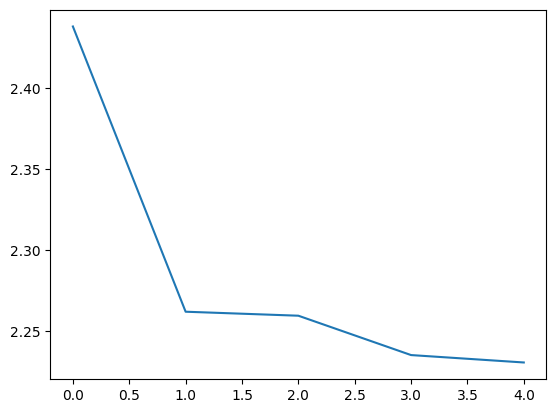

  2%|▏         | 5/235 [00:01<00:54,  4.20it/s]

Batch 5: Loss = 2.2045, Accuracy = 0.2656


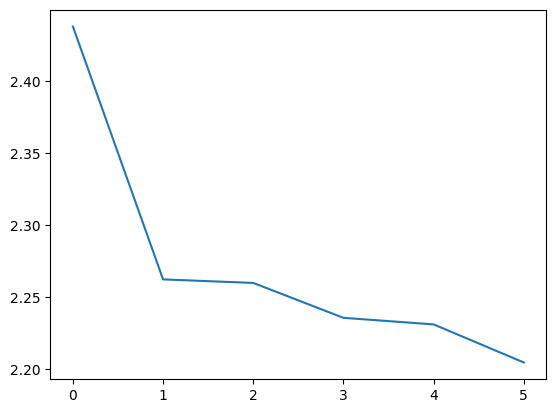

  3%|▎         | 6/235 [00:01<00:53,  4.25it/s]

Batch 6: Loss = 2.1690, Accuracy = 0.4141


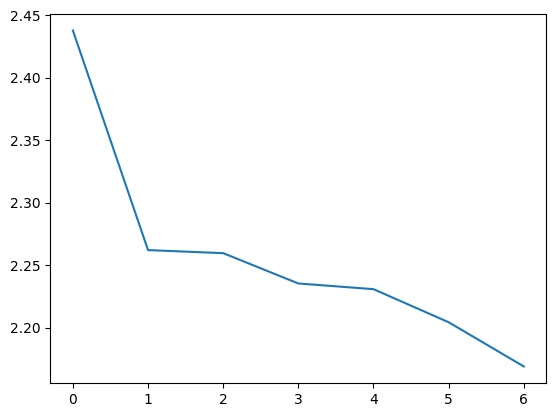

  3%|▎         | 7/235 [00:01<00:53,  4.24it/s]

Batch 7: Loss = 2.2131, Accuracy = 0.1875


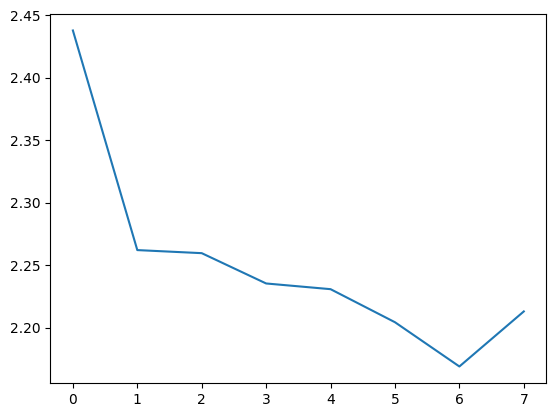

  3%|▎         | 8/235 [00:01<00:53,  4.24it/s]

Batch 8: Loss = 2.1843, Accuracy = 0.2852


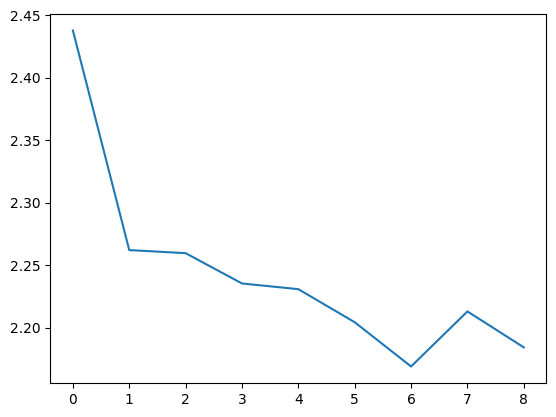

  4%|▍         | 9/235 [00:02<00:53,  4.19it/s]

Batch 9: Loss = 2.1391, Accuracy = 0.2930


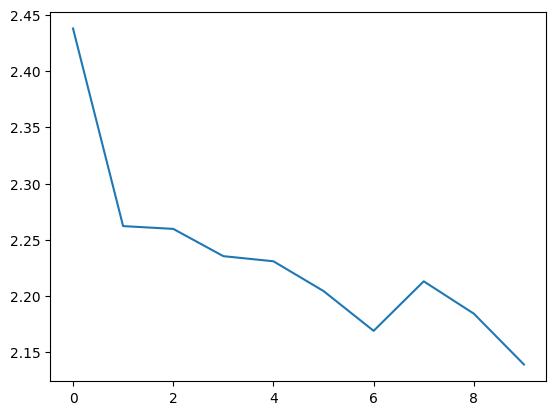

  4%|▍         | 10/235 [00:02<00:53,  4.23it/s]

Batch 10: Loss = 2.1254, Accuracy = 0.3164


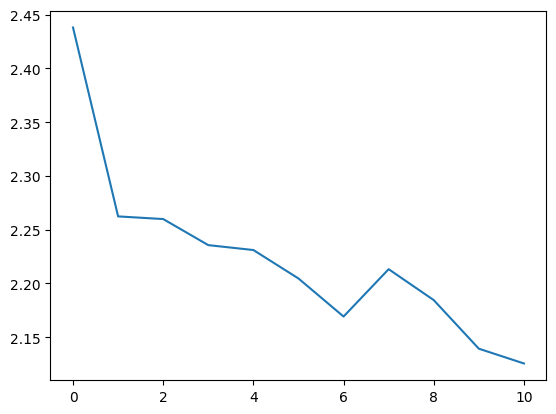

  5%|▍         | 11/235 [00:02<00:52,  4.26it/s]

Batch 11: Loss = 2.1329, Accuracy = 0.2891


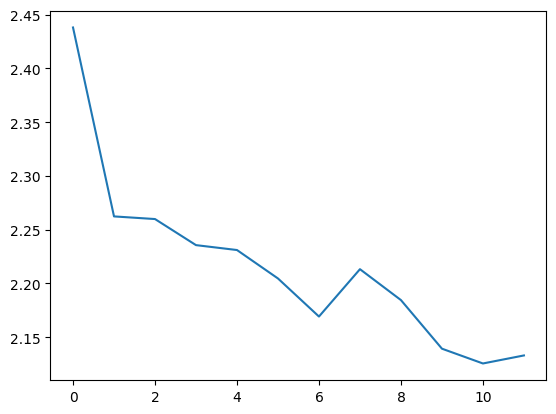

  5%|▌         | 12/235 [00:02<00:52,  4.27it/s]

Batch 12: Loss = 2.1008, Accuracy = 0.3906


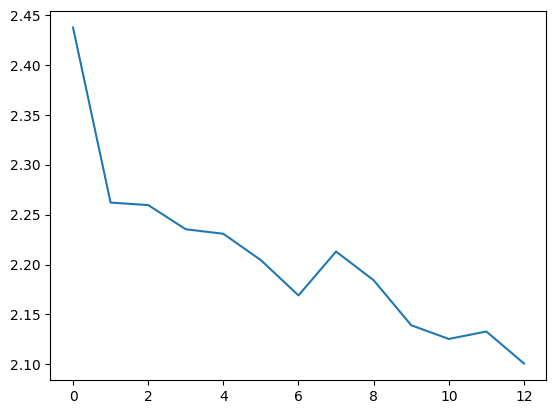

  6%|▌         | 13/235 [00:03<00:53,  4.15it/s]

Batch 13: Loss = 2.0984, Accuracy = 0.4375


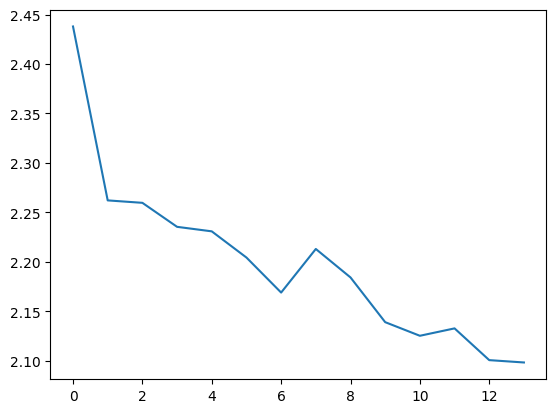

  6%|▌         | 14/235 [00:03<00:53,  4.11it/s]

Batch 14: Loss = 2.0646, Accuracy = 0.4727


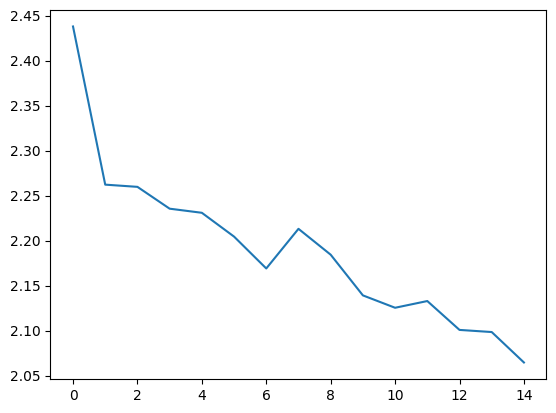

  6%|▋         | 15/235 [00:03<00:54,  4.05it/s]

Batch 15: Loss = 2.0873, Accuracy = 0.3945


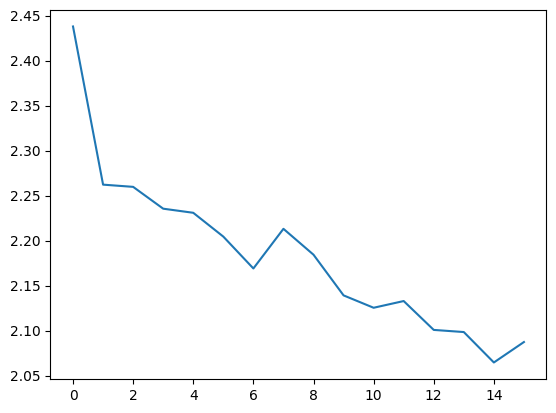

  7%|▋         | 16/235 [00:03<00:55,  3.97it/s]

Batch 16: Loss = 2.0439, Accuracy = 0.4531


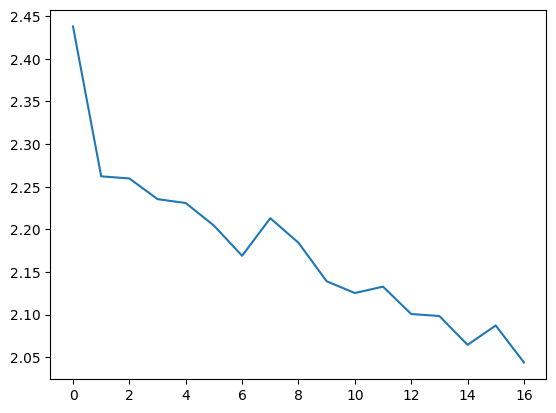

  7%|▋         | 17/235 [00:04<01:03,  3.44it/s]

Batch 17: Loss = 2.0705, Accuracy = 0.4922


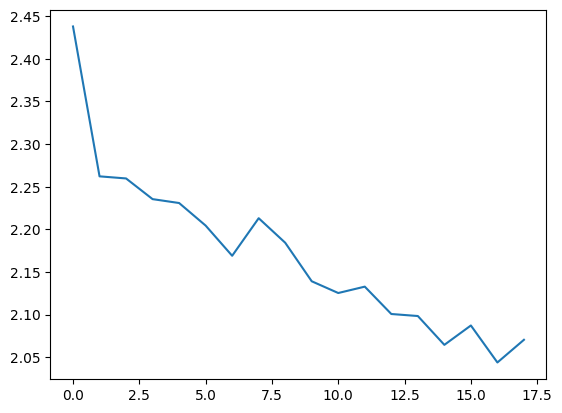

  8%|▊         | 18/235 [00:04<01:01,  3.55it/s]

Batch 18: Loss = 2.0101, Accuracy = 0.5352


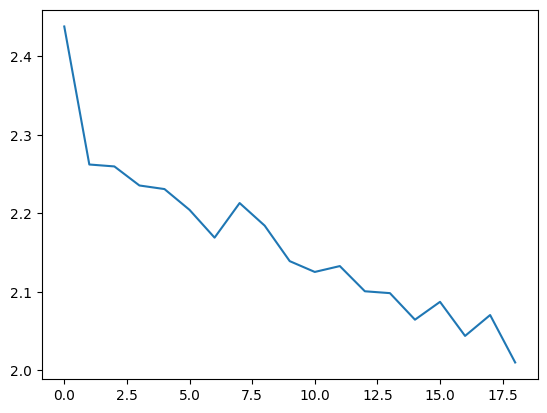

  8%|▊         | 19/235 [00:04<00:58,  3.72it/s]

Batch 19: Loss = 2.0224, Accuracy = 0.5117


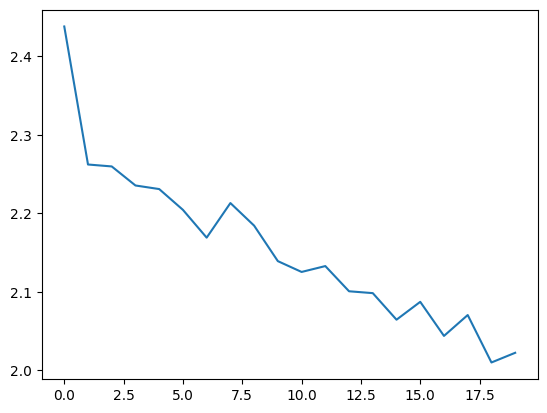

  9%|▊         | 20/235 [00:04<00:55,  3.85it/s]

Batch 20: Loss = 1.9943, Accuracy = 0.4727


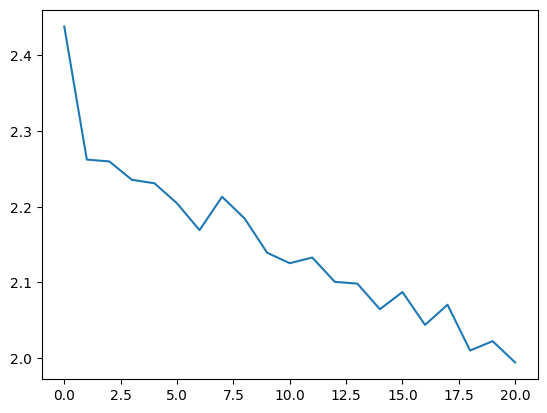

  9%|▉         | 21/235 [00:05<00:54,  3.93it/s]

Batch 21: Loss = 1.9632, Accuracy = 0.5000


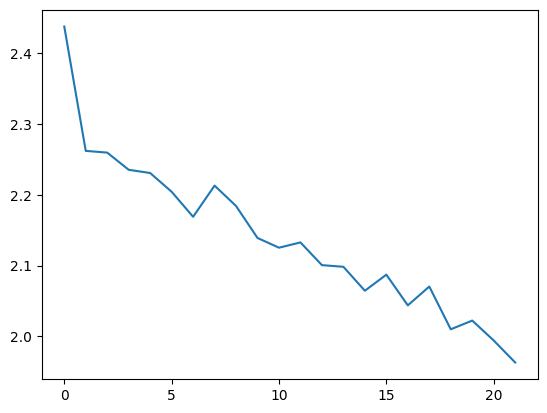

  9%|▉         | 22/235 [00:05<00:52,  4.08it/s]

Batch 22: Loss = 1.9660, Accuracy = 0.5508


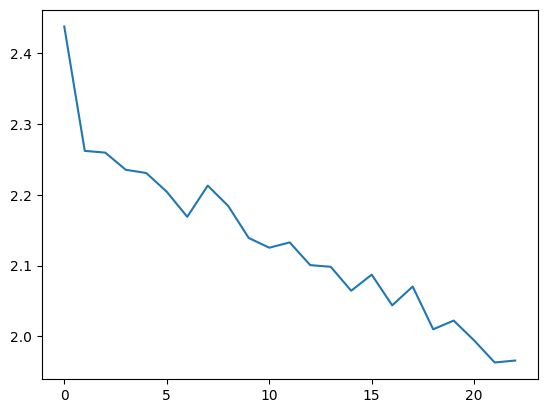

 10%|▉         | 23/235 [00:05<00:49,  4.29it/s]

Batch 23: Loss = 1.9622, Accuracy = 0.4727


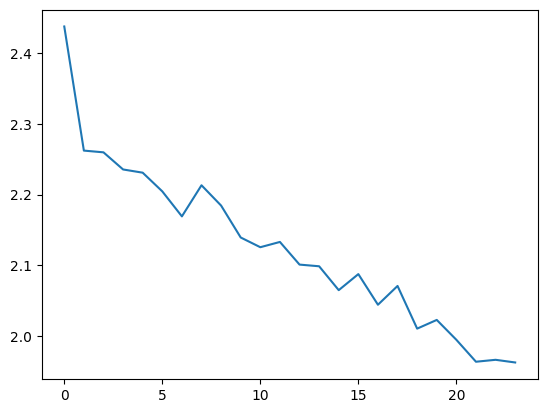

 10%|█         | 24/235 [00:05<00:48,  4.38it/s]

Batch 24: Loss = 1.9513, Accuracy = 0.5312


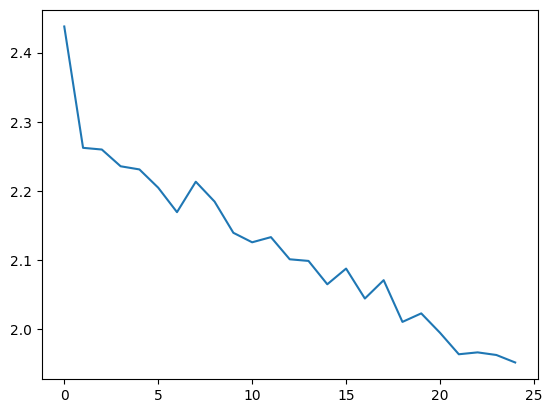

 11%|█         | 25/235 [00:06<00:46,  4.47it/s]

Batch 25: Loss = 1.9470, Accuracy = 0.5859


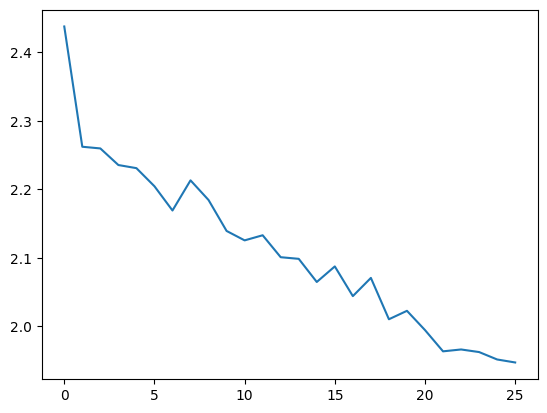

 11%|█         | 26/235 [00:06<00:46,  4.46it/s]

Batch 26: Loss = 1.9196, Accuracy = 0.5938


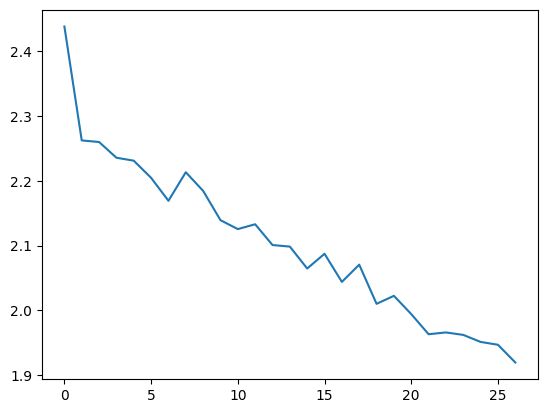

 11%|█▏        | 27/235 [00:06<00:46,  4.46it/s]

Batch 27: Loss = 1.8664, Accuracy = 0.5938


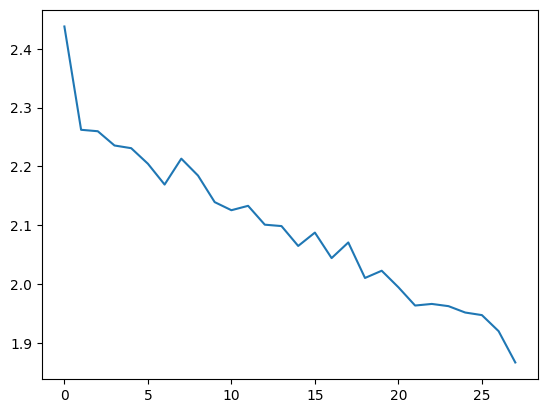

 12%|█▏        | 28/235 [00:06<00:46,  4.43it/s]

Batch 28: Loss = 1.8909, Accuracy = 0.4727


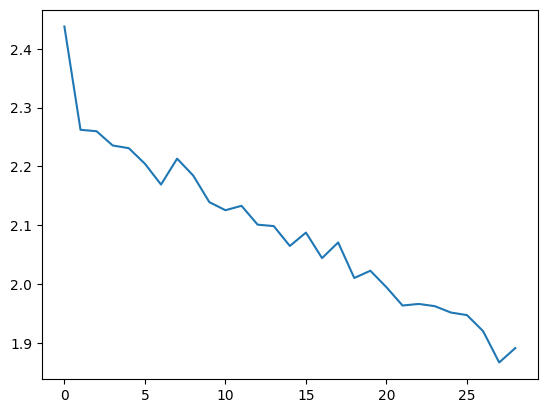

 12%|█▏        | 29/235 [00:06<00:46,  4.42it/s]

Batch 29: Loss = 1.8504, Accuracy = 0.5664


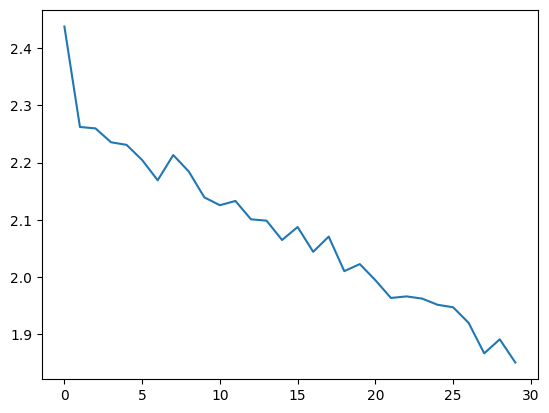

 13%|█▎        | 30/235 [00:07<00:47,  4.32it/s]

Batch 30: Loss = 1.8676, Accuracy = 0.4766


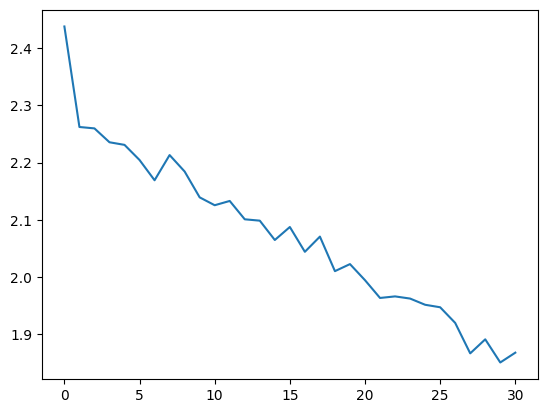

 13%|█▎        | 31/235 [00:07<00:47,  4.33it/s]

Batch 31: Loss = 1.8066, Accuracy = 0.6406


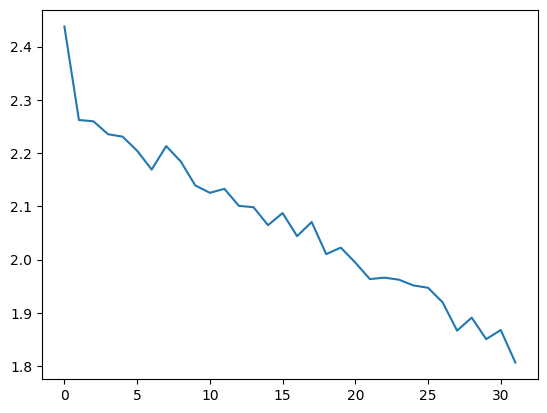

 14%|█▎        | 32/235 [00:07<00:47,  4.26it/s]

Batch 32: Loss = 1.8393, Accuracy = 0.5078


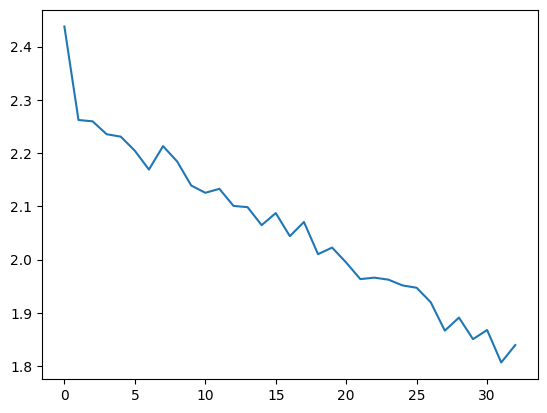

 14%|█▍        | 33/235 [00:07<00:47,  4.24it/s]

Batch 33: Loss = 1.8006, Accuracy = 0.6133


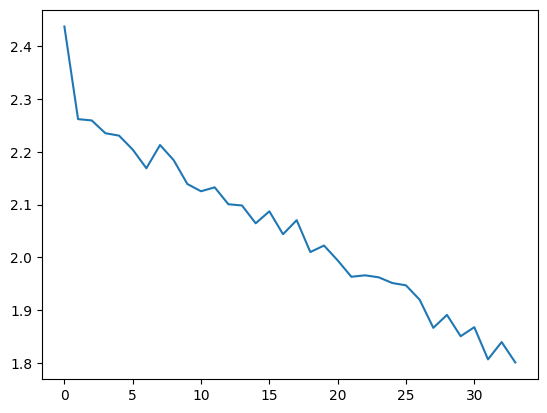

 14%|█▍        | 34/235 [00:08<00:47,  4.25it/s]

Batch 34: Loss = 1.7780, Accuracy = 0.6680


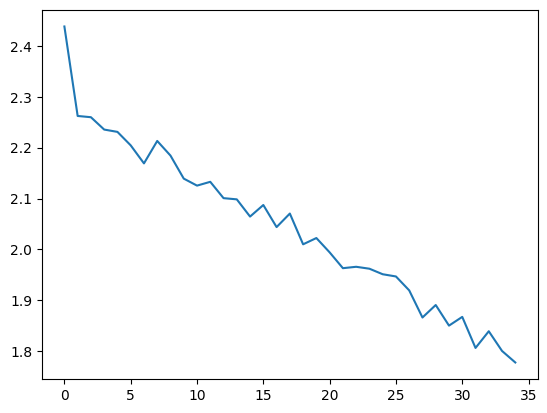

 15%|█▍        | 35/235 [00:08<00:46,  4.28it/s]

Batch 35: Loss = 1.7872, Accuracy = 0.5469


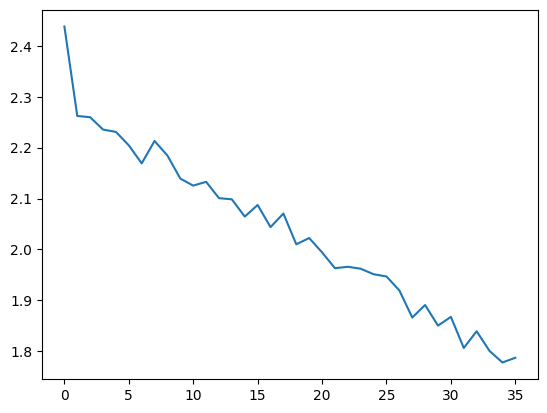

 15%|█▌        | 36/235 [00:08<00:46,  4.29it/s]

Batch 36: Loss = 1.7426, Accuracy = 0.6016


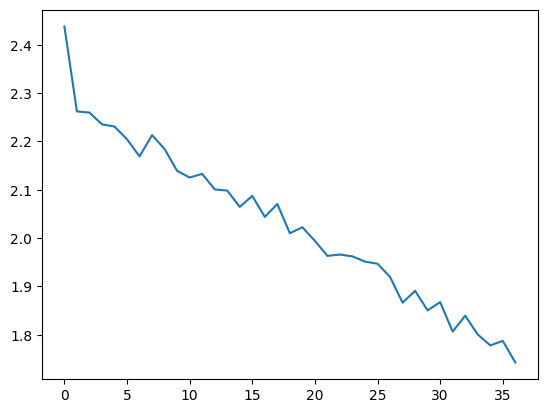

 16%|█▌        | 37/235 [00:08<00:46,  4.28it/s]

Batch 37: Loss = 1.7278, Accuracy = 0.6523


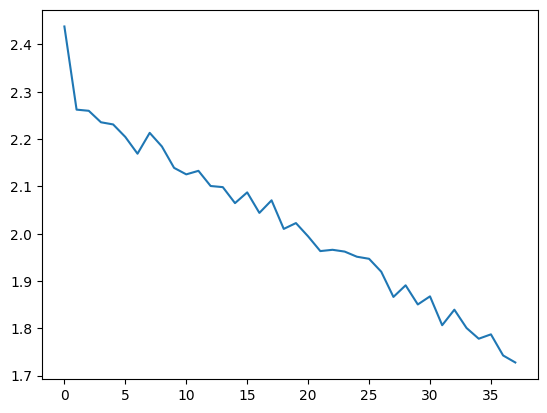

 16%|█▌        | 38/235 [00:09<00:53,  3.70it/s]

Batch 38: Loss = 1.7641, Accuracy = 0.5508


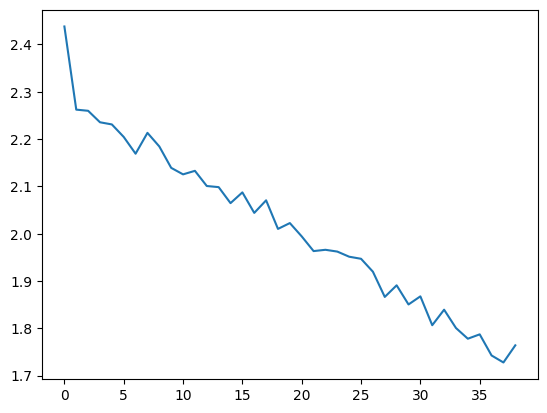

 17%|█▋        | 39/235 [00:09<00:52,  3.74it/s]

Batch 39: Loss = 1.7830, Accuracy = 0.5625


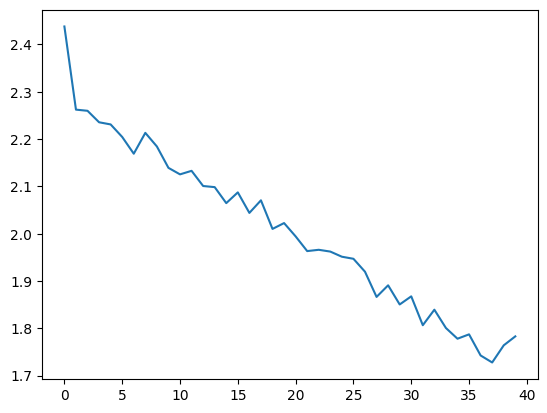

 17%|█▋        | 40/235 [00:09<00:50,  3.85it/s]

Batch 40: Loss = 1.7108, Accuracy = 0.6797


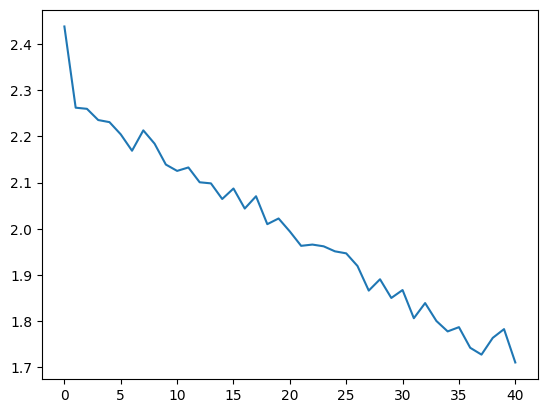

 17%|█▋        | 41/235 [00:10<00:52,  3.73it/s]

Batch 41: Loss = 1.7492, Accuracy = 0.6328


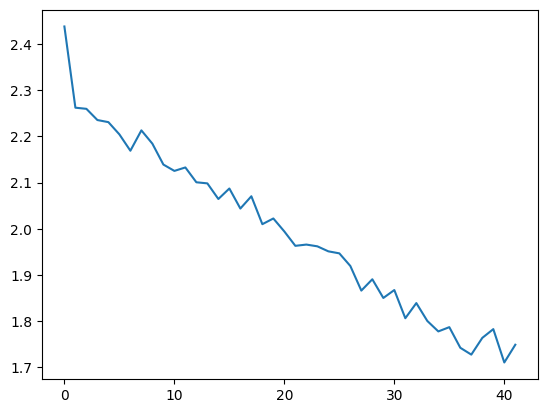

 18%|█▊        | 42/235 [00:10<00:49,  3.91it/s]

Batch 42: Loss = 1.6943, Accuracy = 0.7070


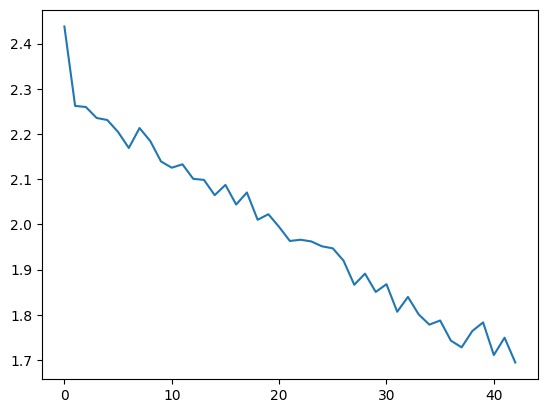

 18%|█▊        | 43/235 [00:10<00:47,  4.07it/s]

Batch 43: Loss = 1.7458, Accuracy = 0.5547


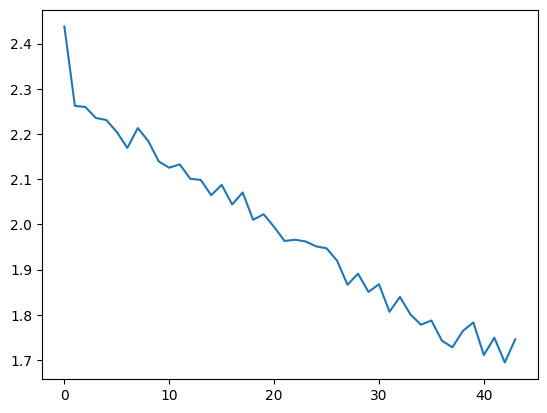

 19%|█▊        | 44/235 [00:10<00:45,  4.20it/s]

Batch 44: Loss = 1.6932, Accuracy = 0.6445


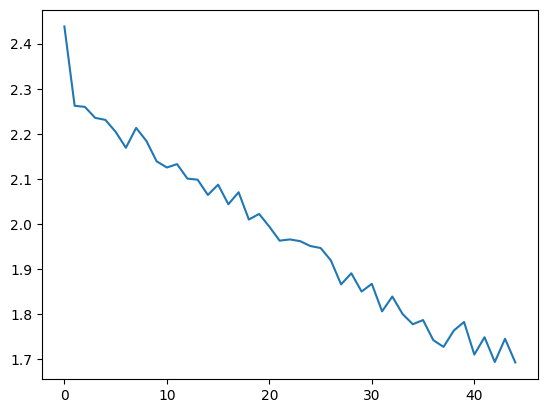

 19%|█▉        | 45/235 [00:10<00:44,  4.30it/s]

Batch 45: Loss = 1.6542, Accuracy = 0.7227


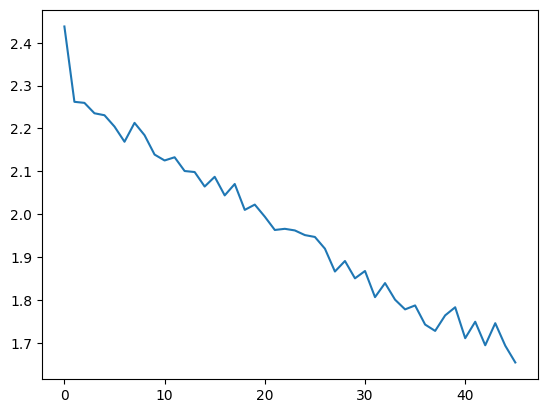

 20%|█▉        | 46/235 [00:11<00:43,  4.34it/s]

Batch 46: Loss = 1.6461, Accuracy = 0.7031


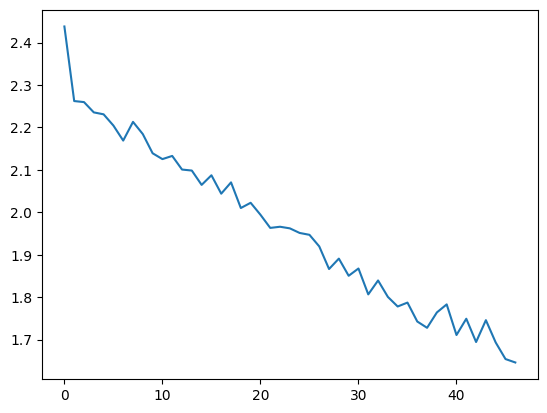

 20%|██        | 47/235 [00:11<00:42,  4.42it/s]

Batch 47: Loss = 1.6458, Accuracy = 0.6953


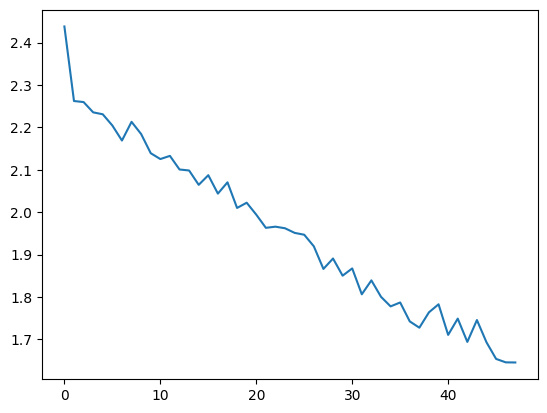

 20%|██        | 48/235 [00:11<00:41,  4.46it/s]

Batch 48: Loss = 1.6129, Accuracy = 0.7227


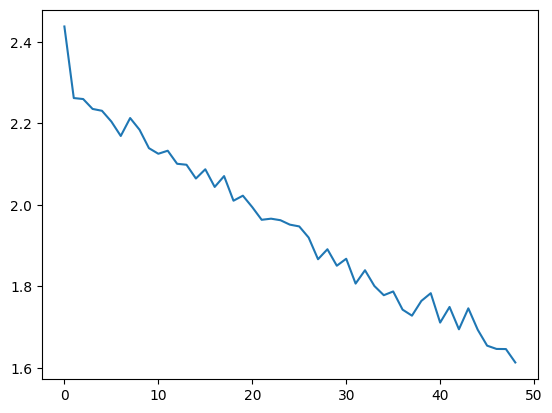

 21%|██        | 49/235 [00:11<00:42,  4.42it/s]

Batch 49: Loss = 1.6359, Accuracy = 0.6602


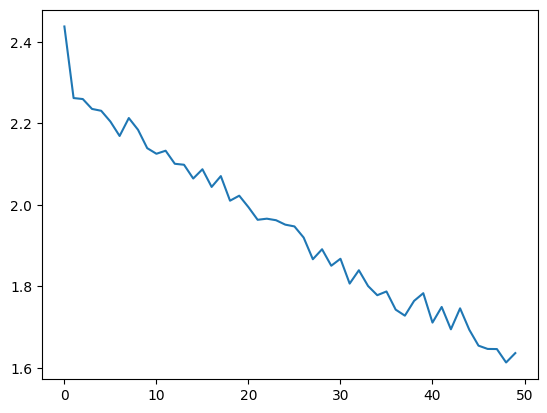

 21%|██▏       | 50/235 [00:12<00:41,  4.43it/s]

Batch 50: Loss = 1.6405, Accuracy = 0.6484


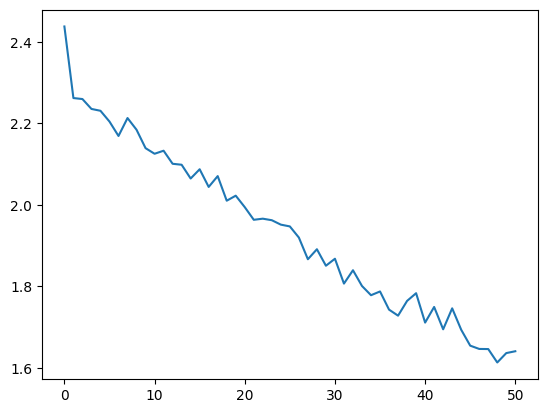

 22%|██▏       | 51/235 [00:12<00:41,  4.47it/s]

Batch 51: Loss = 1.5398, Accuracy = 0.7695


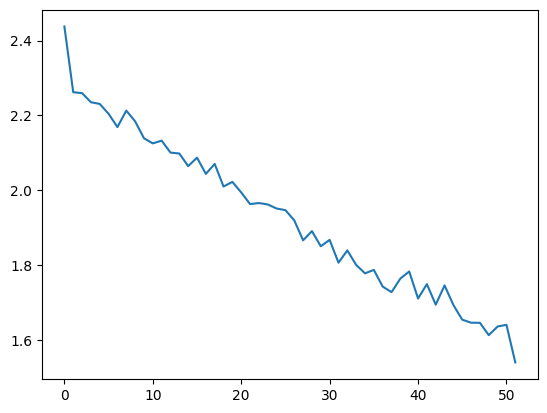

 22%|██▏       | 52/235 [00:12<00:41,  4.46it/s]

Batch 52: Loss = 1.5839, Accuracy = 0.6797


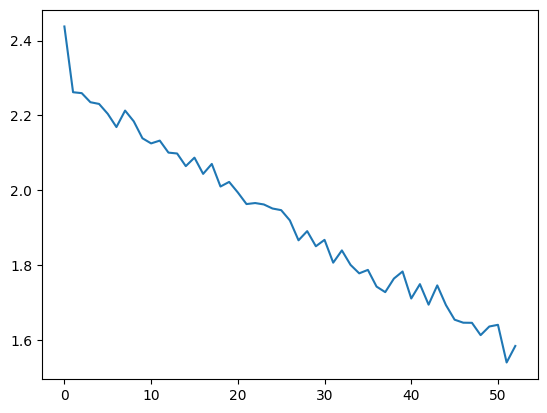

 23%|██▎       | 53/235 [00:12<00:40,  4.48it/s]

Batch 53: Loss = 1.5456, Accuracy = 0.6445


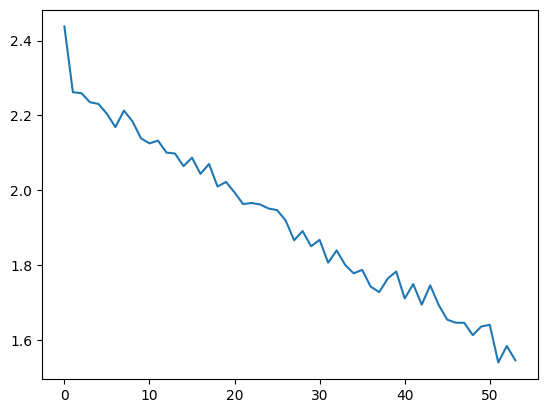

 23%|██▎       | 54/235 [00:12<00:40,  4.49it/s]

Batch 54: Loss = 1.6110, Accuracy = 0.6211


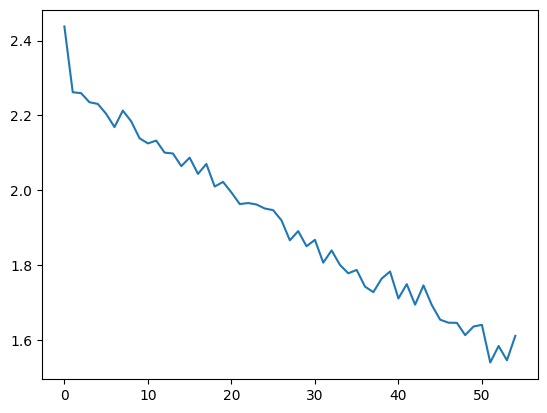

 23%|██▎       | 55/235 [00:13<00:40,  4.46it/s]

Batch 55: Loss = 1.6204, Accuracy = 0.6055


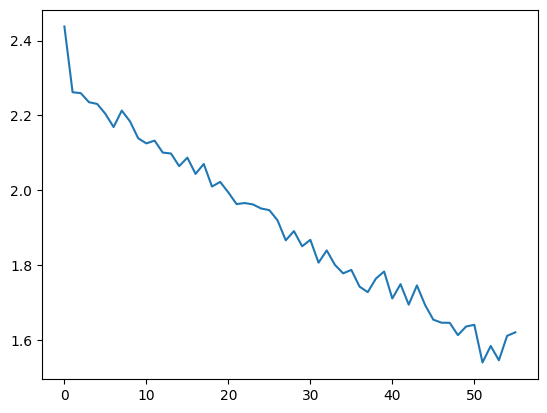

 24%|██▍       | 56/235 [00:13<00:40,  4.47it/s]

Batch 56: Loss = 1.5539, Accuracy = 0.7109


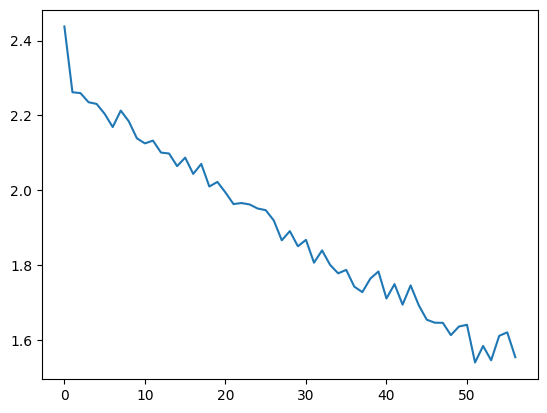

 24%|██▍       | 57/235 [00:13<00:39,  4.47it/s]

Batch 57: Loss = 1.5240, Accuracy = 0.7109


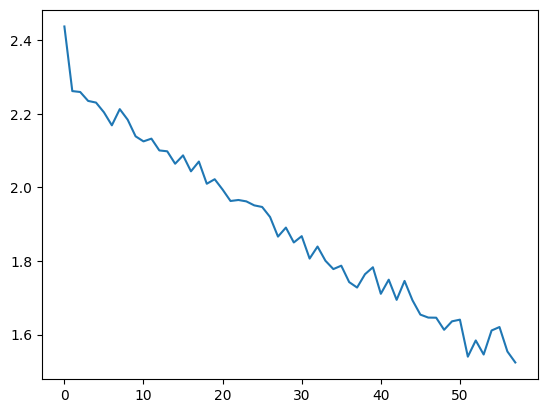

 25%|██▍       | 58/235 [00:13<00:39,  4.45it/s]

Batch 58: Loss = 1.5438, Accuracy = 0.6797


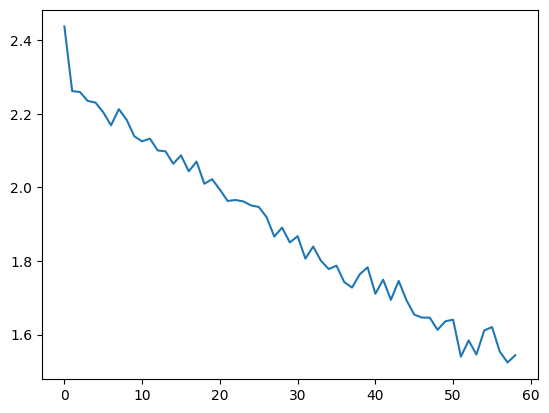

 25%|██▌       | 59/235 [00:14<00:46,  3.75it/s]

Batch 59: Loss = 1.5489, Accuracy = 0.7188


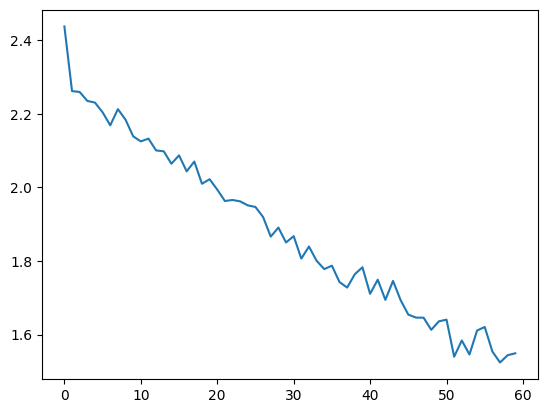

 26%|██▌       | 60/235 [00:14<00:44,  3.93it/s]

Batch 60: Loss = 1.4723, Accuracy = 0.7109


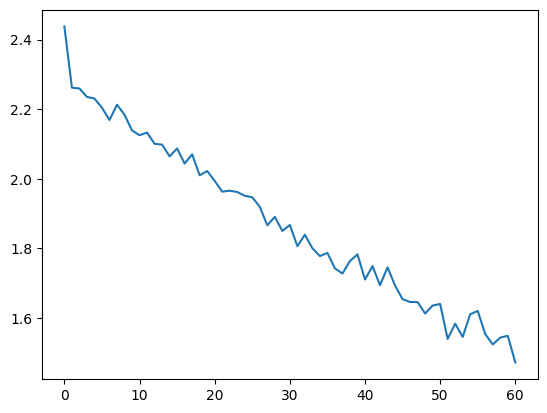

 26%|██▌       | 61/235 [00:14<00:42,  4.06it/s]

Batch 61: Loss = 1.5051, Accuracy = 0.6914


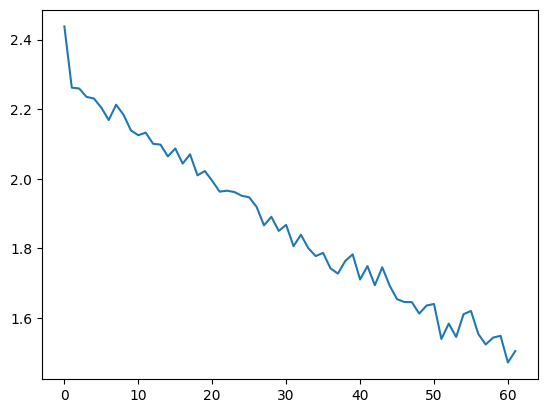

 26%|██▋       | 62/235 [00:14<00:41,  4.16it/s]

Batch 62: Loss = 1.4752, Accuracy = 0.7148


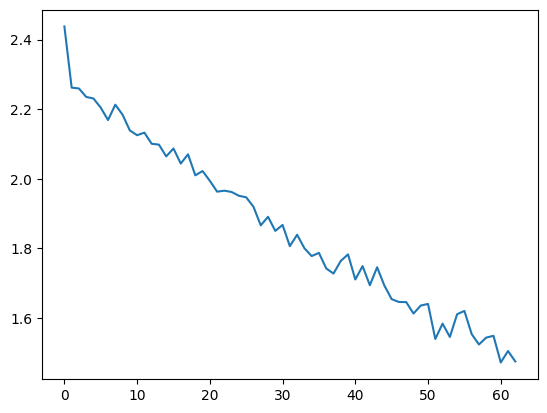

 27%|██▋       | 63/235 [00:15<00:39,  4.31it/s]

Batch 63: Loss = 1.4747, Accuracy = 0.7617


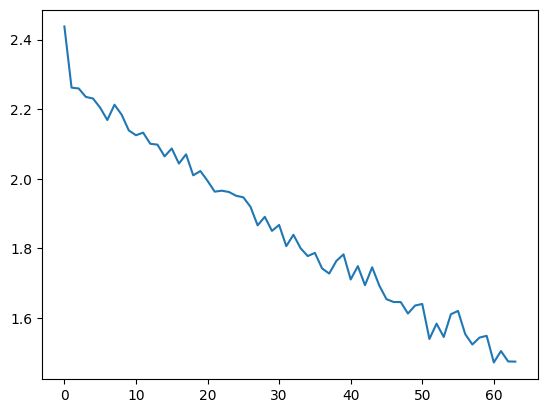

 27%|██▋       | 64/235 [00:15<00:39,  4.38it/s]

Batch 64: Loss = 1.4603, Accuracy = 0.7148


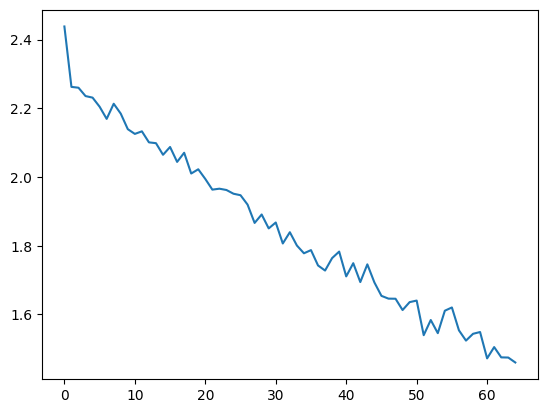

 28%|██▊       | 65/235 [00:15<00:38,  4.46it/s]

Batch 65: Loss = 1.4858, Accuracy = 0.6953


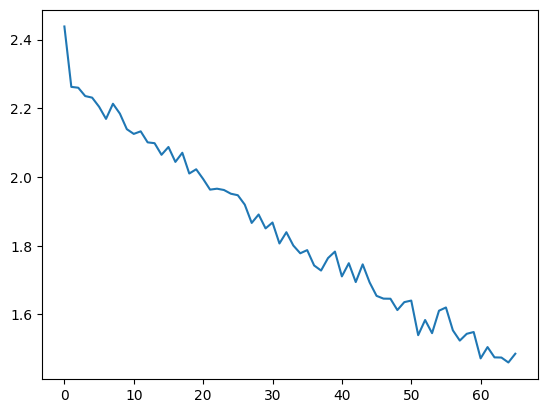

 28%|██▊       | 66/235 [00:15<00:38,  4.43it/s]

Batch 66: Loss = 1.4769, Accuracy = 0.7188


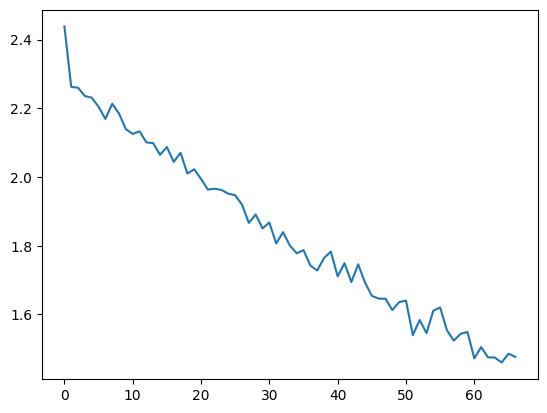

 29%|██▊       | 67/235 [00:15<00:38,  4.38it/s]

Batch 67: Loss = 1.4434, Accuracy = 0.7656


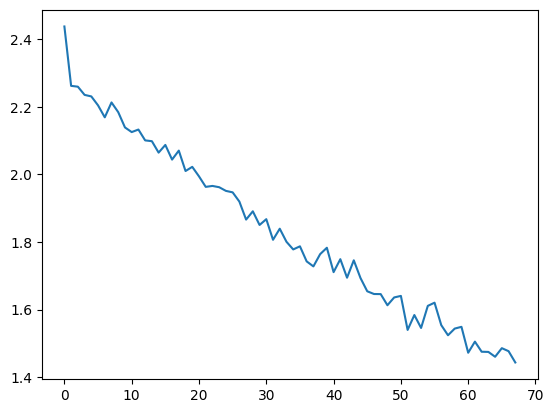

 29%|██▉       | 68/235 [00:16<00:38,  4.30it/s]

Batch 68: Loss = 1.3991, Accuracy = 0.7305


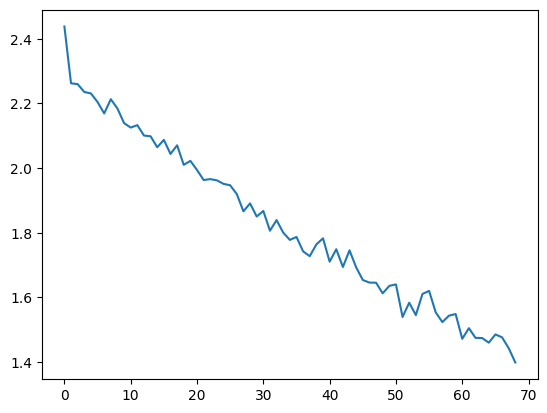

 29%|██▉       | 69/235 [00:16<00:38,  4.28it/s]

Batch 69: Loss = 1.4429, Accuracy = 0.7227


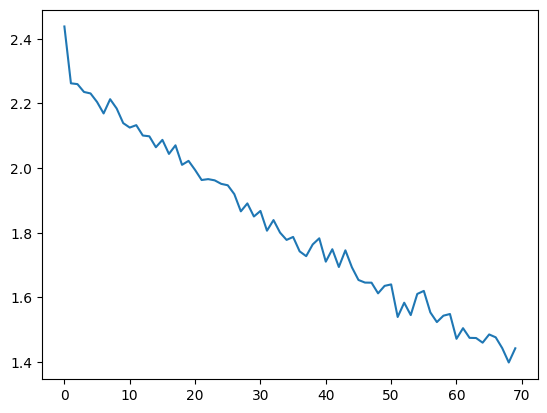

 30%|██▉       | 70/235 [00:16<00:38,  4.32it/s]

Batch 70: Loss = 1.4066, Accuracy = 0.7578


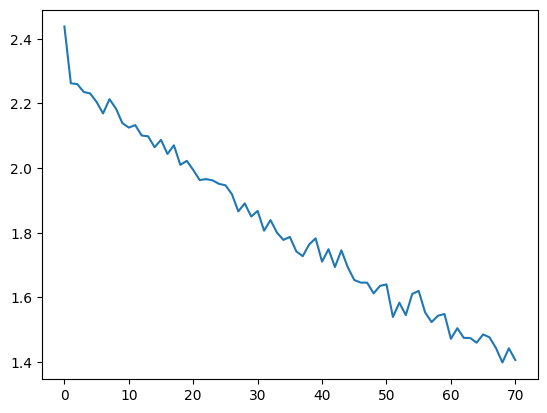

 30%|███       | 71/235 [00:16<00:37,  4.37it/s]

Batch 71: Loss = 1.3906, Accuracy = 0.7422


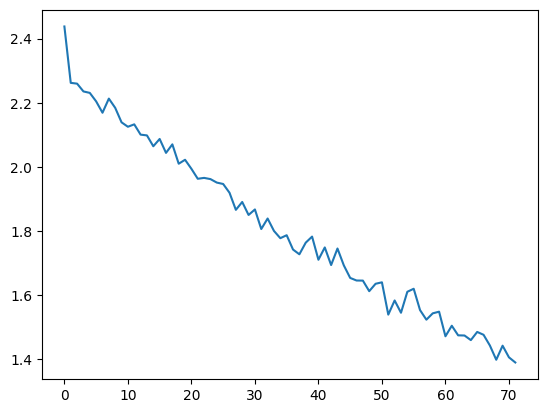

 31%|███       | 72/235 [00:17<00:37,  4.38it/s]

Batch 72: Loss = 1.3669, Accuracy = 0.7461


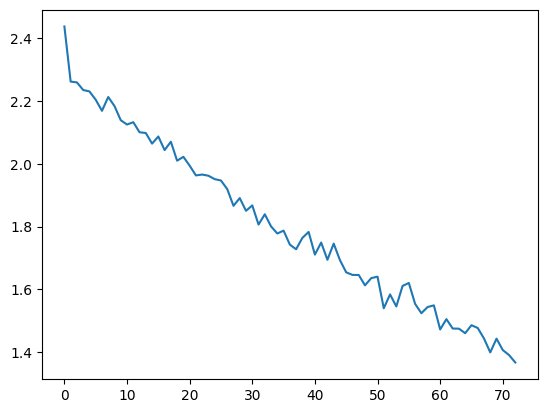

 31%|███       | 73/235 [00:17<00:37,  4.35it/s]

Batch 73: Loss = 1.3529, Accuracy = 0.7461


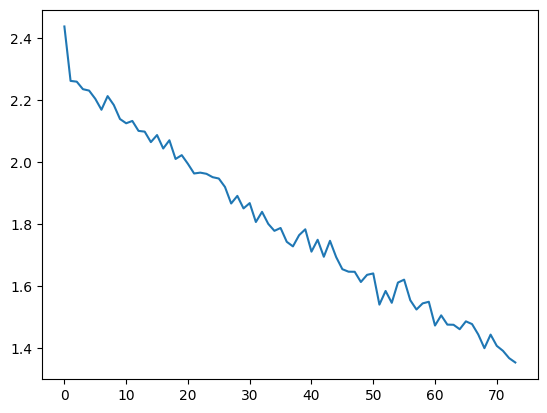

 31%|███▏      | 74/235 [00:17<00:37,  4.30it/s]

Batch 74: Loss = 1.3555, Accuracy = 0.7422


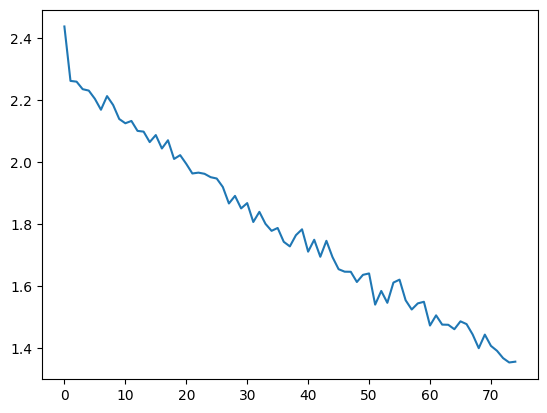

 32%|███▏      | 75/235 [00:17<00:36,  4.37it/s]

Batch 75: Loss = 1.3767, Accuracy = 0.6914


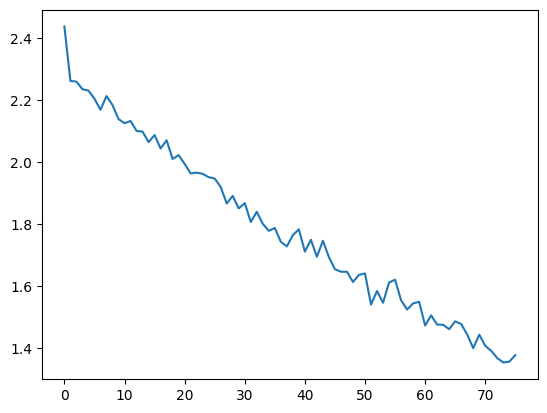

 32%|███▏      | 76/235 [00:18<00:36,  4.40it/s]

Batch 76: Loss = 1.3424, Accuracy = 0.7500


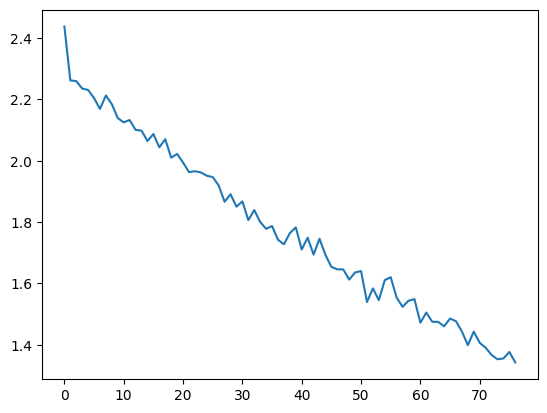

 33%|███▎      | 77/235 [00:18<00:35,  4.44it/s]

Batch 77: Loss = 1.4241, Accuracy = 0.6914


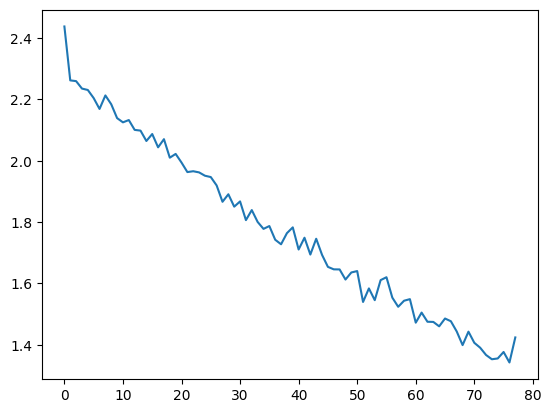

 33%|███▎      | 78/235 [00:18<00:35,  4.37it/s]

Batch 78: Loss = 1.3675, Accuracy = 0.7500


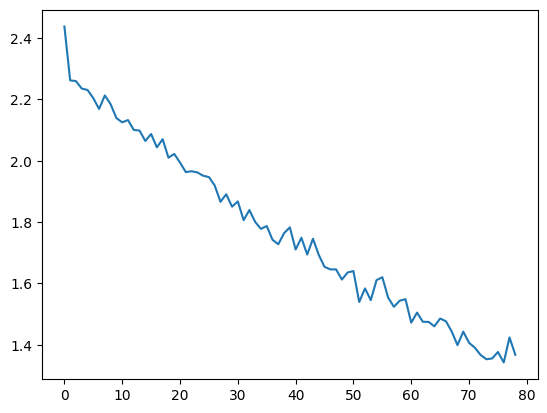

 34%|███▎      | 79/235 [00:18<00:40,  3.82it/s]

Batch 79: Loss = 1.3228, Accuracy = 0.7266


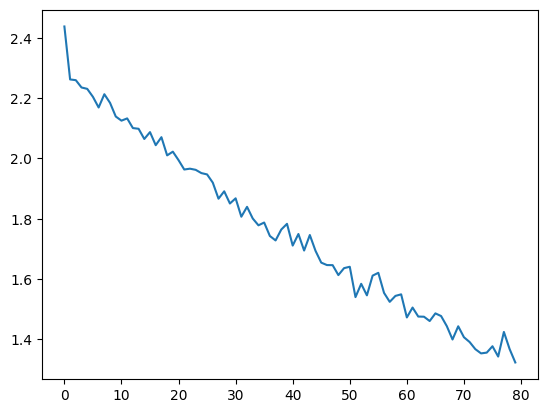

 34%|███▍      | 80/235 [00:19<00:39,  3.92it/s]

Batch 80: Loss = 1.3007, Accuracy = 0.7852


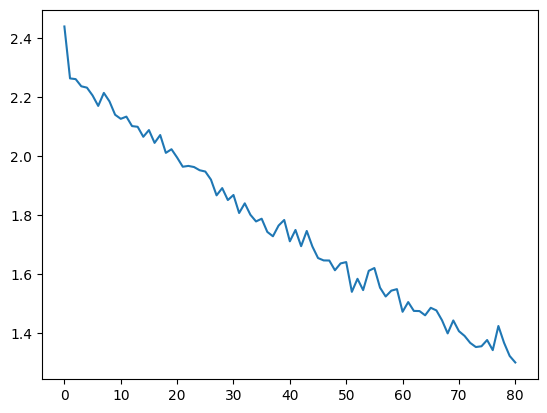

 34%|███▍      | 81/235 [00:19<00:38,  3.97it/s]

Batch 81: Loss = 1.3454, Accuracy = 0.7148


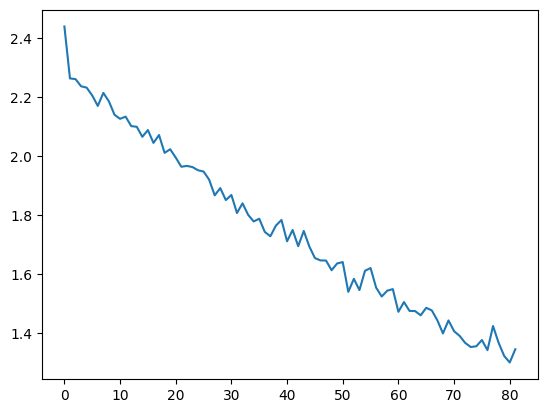

 35%|███▍      | 82/235 [00:19<00:37,  4.04it/s]

Batch 82: Loss = 1.3091, Accuracy = 0.7539


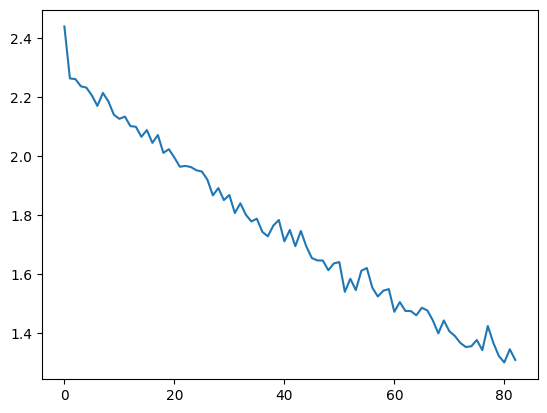

 35%|███▌      | 83/235 [00:19<00:35,  4.23it/s]

Batch 83: Loss = 1.3893, Accuracy = 0.6562


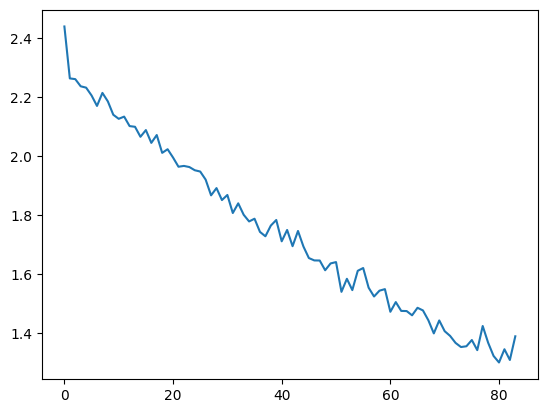

 36%|███▌      | 84/235 [00:20<00:36,  4.14it/s]

Batch 84: Loss = 1.3679, Accuracy = 0.6875


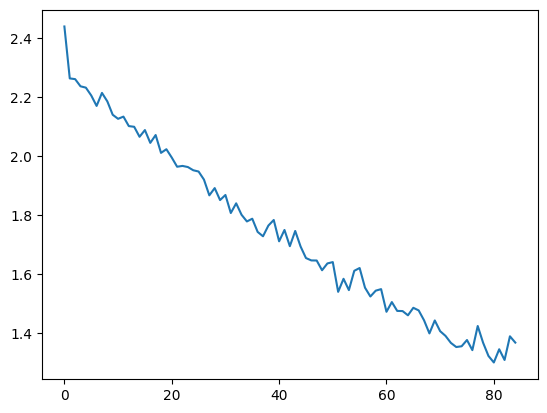

 36%|███▌      | 85/235 [00:20<00:34,  4.31it/s]

Batch 85: Loss = 1.2729, Accuracy = 0.7773


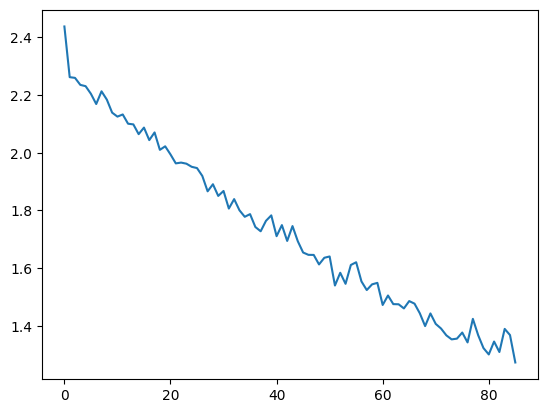

 37%|███▋      | 86/235 [00:20<00:33,  4.45it/s]

Batch 86: Loss = 1.3266, Accuracy = 0.7344


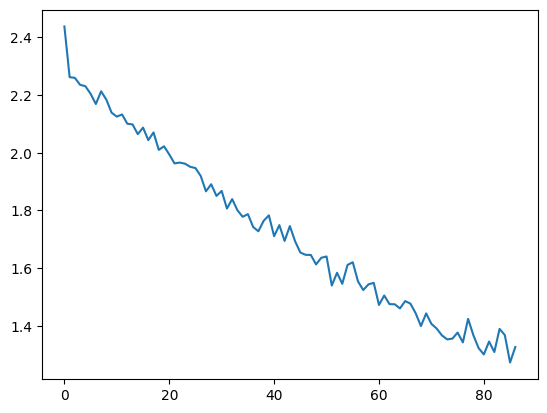

 37%|███▋      | 87/235 [00:20<00:32,  4.52it/s]

Batch 87: Loss = 1.2541, Accuracy = 0.7656


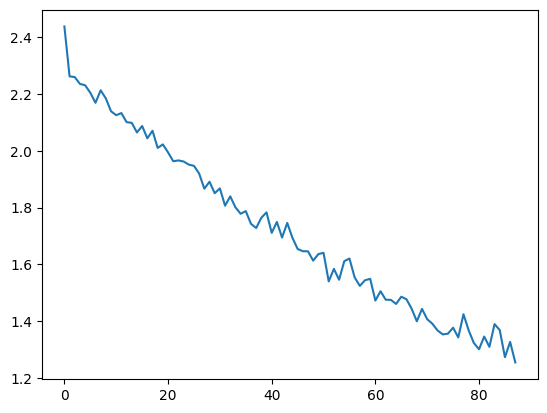

 37%|███▋      | 88/235 [00:20<00:32,  4.58it/s]

Batch 88: Loss = 1.2586, Accuracy = 0.7812


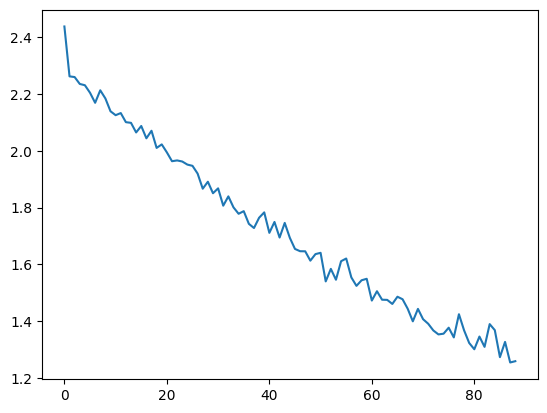

 38%|███▊      | 89/235 [00:21<00:31,  4.58it/s]

Batch 89: Loss = 1.2885, Accuracy = 0.7656


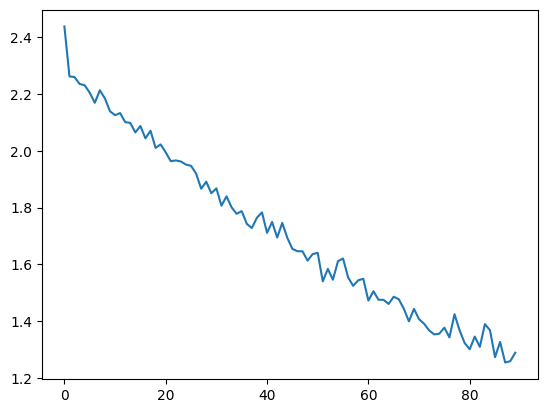

 38%|███▊      | 90/235 [00:21<00:32,  4.42it/s]

Batch 90: Loss = 1.2498, Accuracy = 0.7344


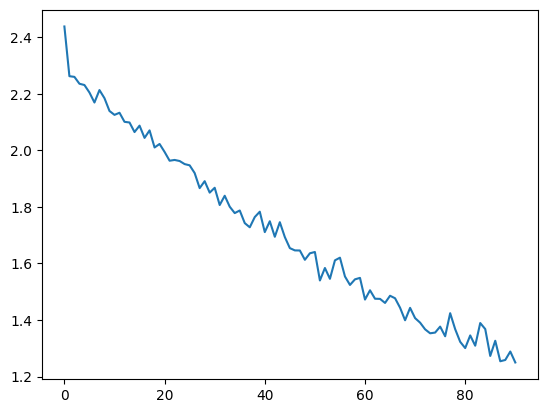

 39%|███▊      | 91/235 [00:21<00:34,  4.13it/s]

Batch 91: Loss = 1.2254, Accuracy = 0.7578


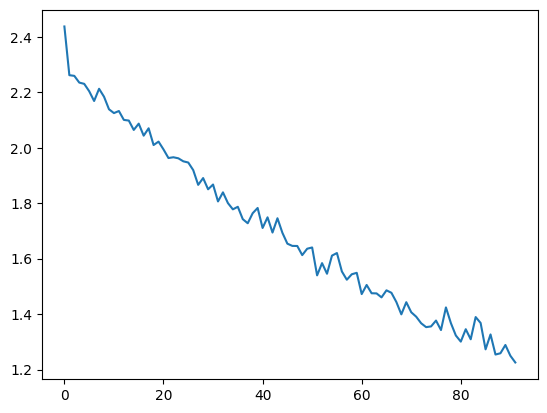

 39%|███▉      | 92/235 [00:21<00:35,  4.08it/s]

Batch 92: Loss = 1.2501, Accuracy = 0.7695


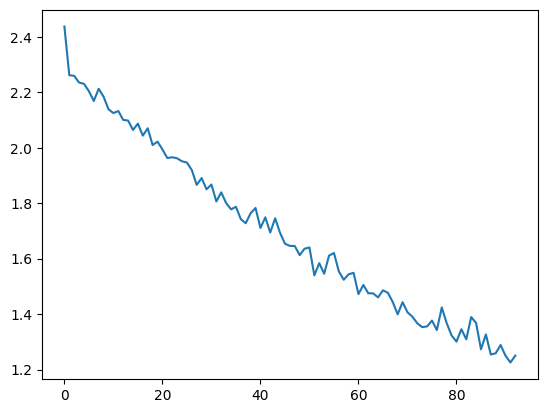

 40%|███▉      | 93/235 [00:22<00:35,  4.01it/s]

Batch 93: Loss = 1.1377, Accuracy = 0.8477


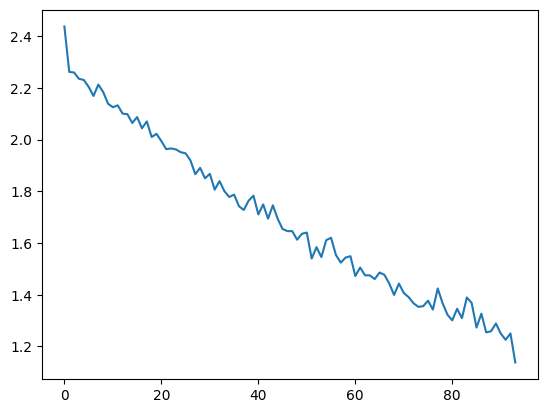

 40%|████      | 94/235 [00:22<00:37,  3.78it/s]

Batch 94: Loss = 1.1823, Accuracy = 0.7695


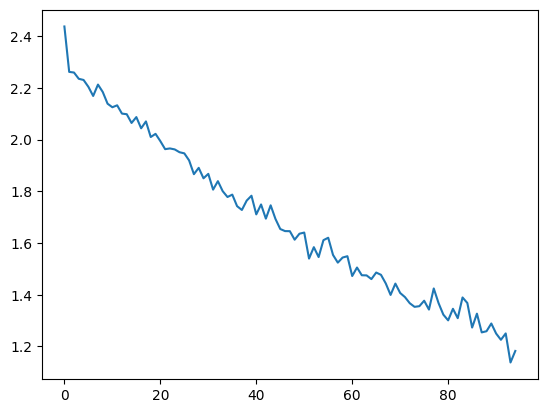

 40%|████      | 95/235 [00:22<00:37,  3.73it/s]

Batch 95: Loss = 1.2171, Accuracy = 0.7891


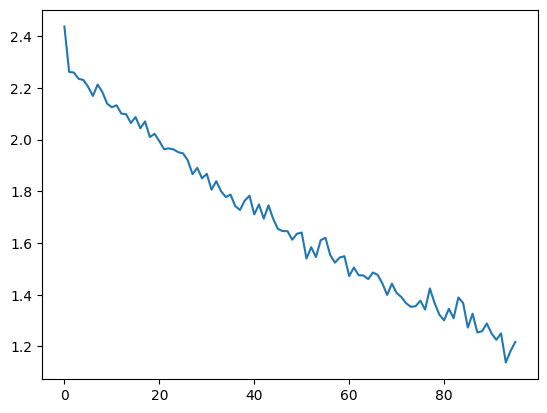

 41%|████      | 96/235 [00:22<00:37,  3.70it/s]

Batch 96: Loss = 1.2197, Accuracy = 0.7969


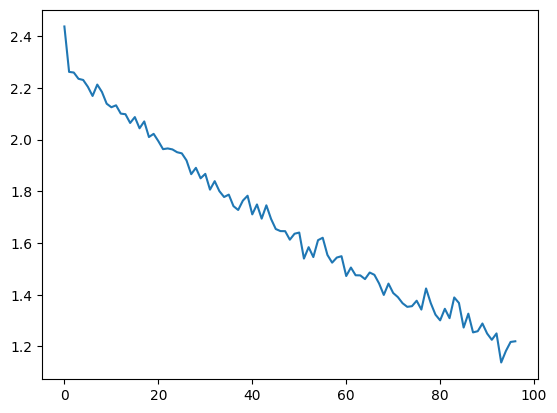

 41%|████▏     | 97/235 [00:23<00:35,  3.85it/s]

Batch 97: Loss = 1.2094, Accuracy = 0.7812


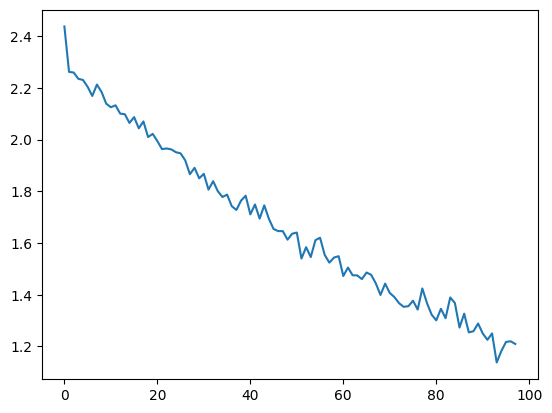

 42%|████▏     | 98/235 [00:23<00:34,  3.98it/s]

Batch 98: Loss = 1.1499, Accuracy = 0.7773


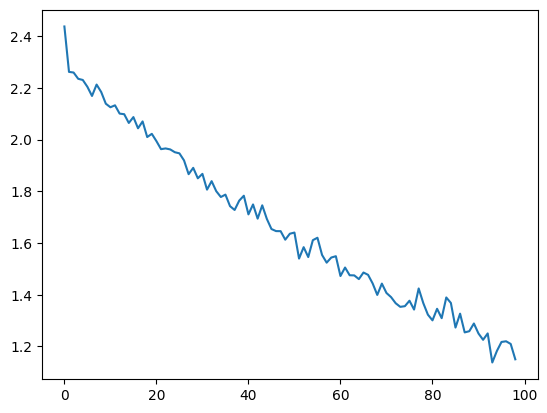

 42%|████▏     | 99/235 [00:23<00:33,  4.03it/s]

Batch 99: Loss = 1.2376, Accuracy = 0.7344


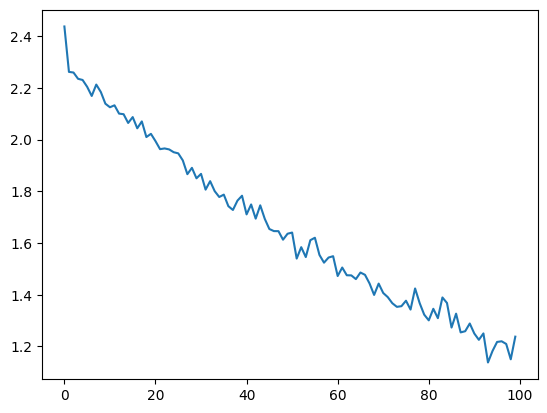

 43%|████▎     | 100/235 [00:23<00:33,  4.05it/s]

Batch 100: Loss = 1.1667, Accuracy = 0.7930


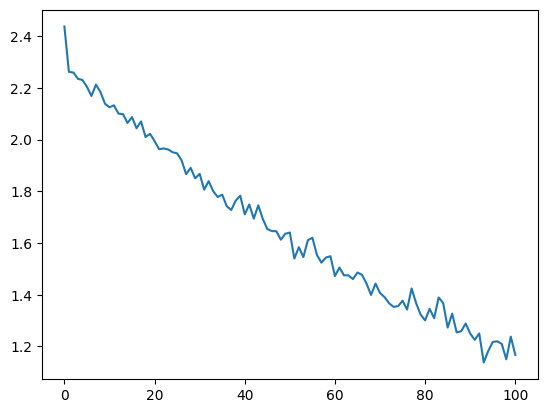

 43%|████▎     | 101/235 [00:24<00:32,  4.08it/s]

Batch 101: Loss = 1.1856, Accuracy = 0.7852


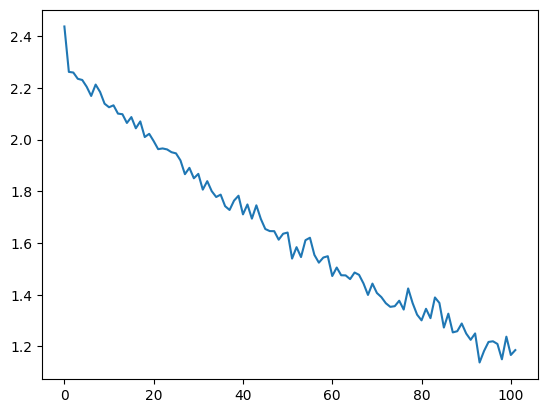

 43%|████▎     | 102/235 [00:24<00:31,  4.18it/s]

Batch 102: Loss = 1.1214, Accuracy = 0.8398


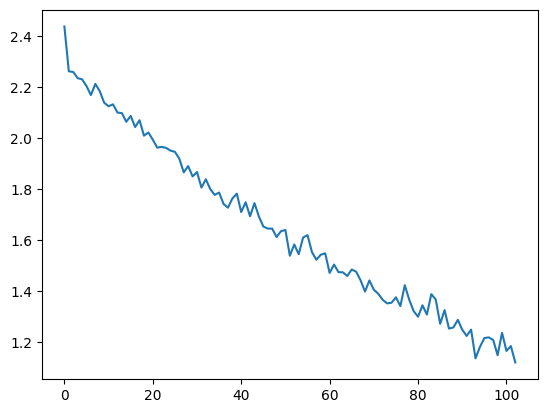

 44%|████▍     | 103/235 [00:24<00:36,  3.58it/s]

Batch 103: Loss = 1.1736, Accuracy = 0.7617


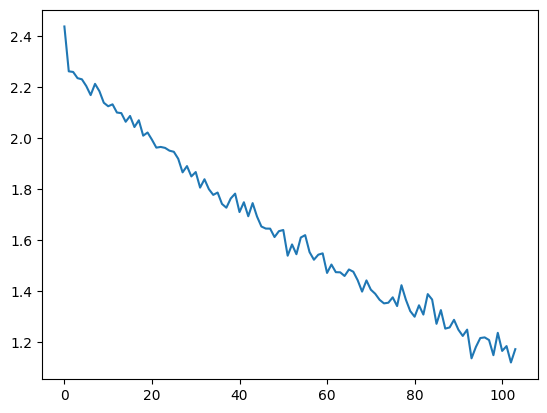

 44%|████▍     | 104/235 [00:24<00:34,  3.78it/s]

Batch 104: Loss = 1.1530, Accuracy = 0.7656


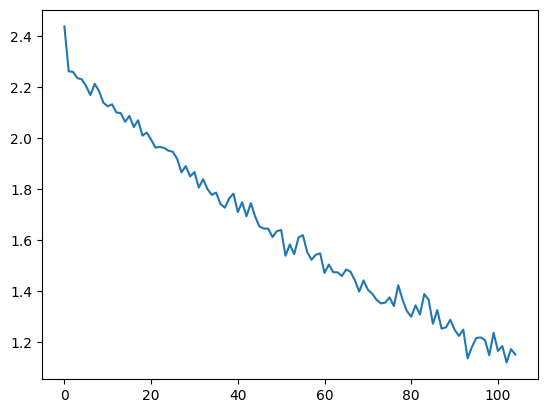

 45%|████▍     | 105/235 [00:25<00:33,  3.93it/s]

Batch 105: Loss = 1.1077, Accuracy = 0.8086


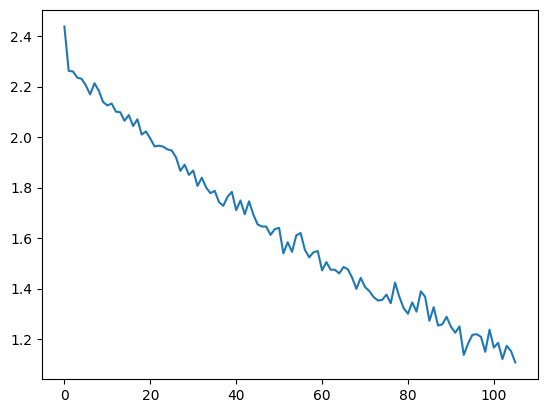

 45%|████▌     | 106/235 [00:25<00:32,  4.01it/s]

Batch 106: Loss = 1.1400, Accuracy = 0.8008


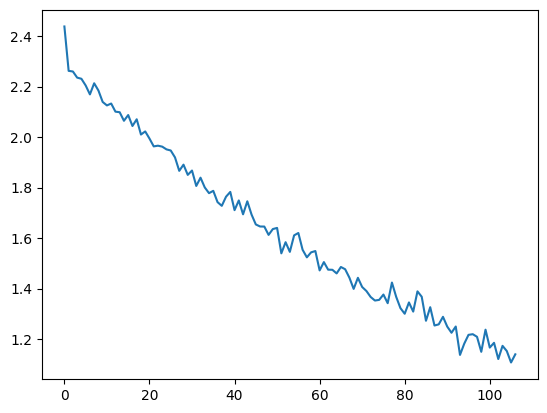

 46%|████▌     | 107/235 [00:25<00:31,  4.10it/s]

Batch 107: Loss = 1.1149, Accuracy = 0.7930


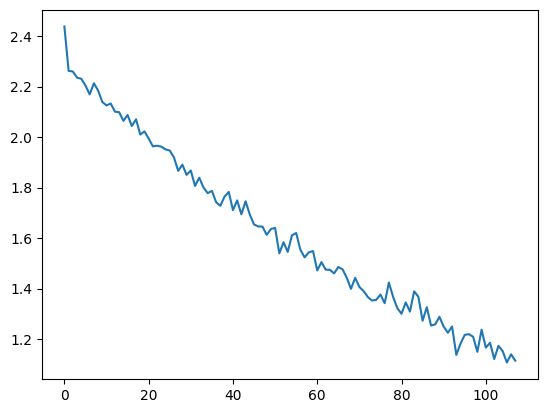

 46%|████▌     | 108/235 [00:25<00:30,  4.13it/s]

Batch 108: Loss = 1.1037, Accuracy = 0.7812


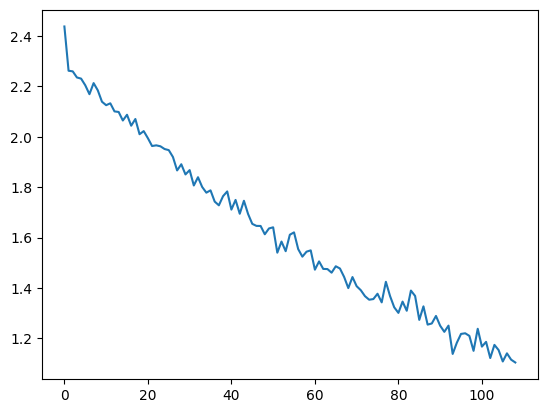

 46%|████▋     | 109/235 [00:26<00:30,  4.15it/s]

Batch 109: Loss = 1.1448, Accuracy = 0.7461


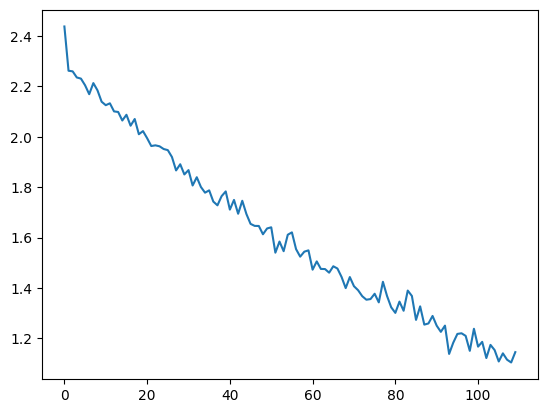

 47%|████▋     | 110/235 [00:26<00:29,  4.27it/s]

Batch 110: Loss = 1.1295, Accuracy = 0.7734


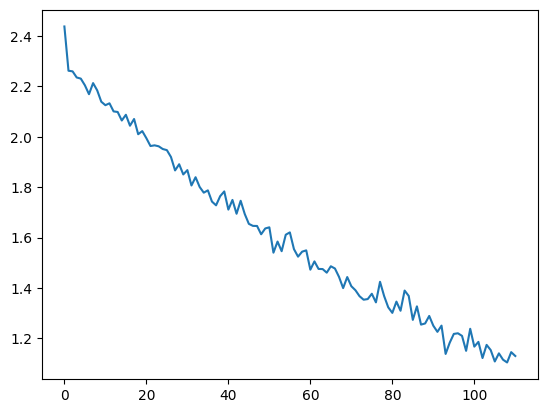

 47%|████▋     | 111/235 [00:26<00:28,  4.29it/s]

Batch 111: Loss = 1.1192, Accuracy = 0.8203


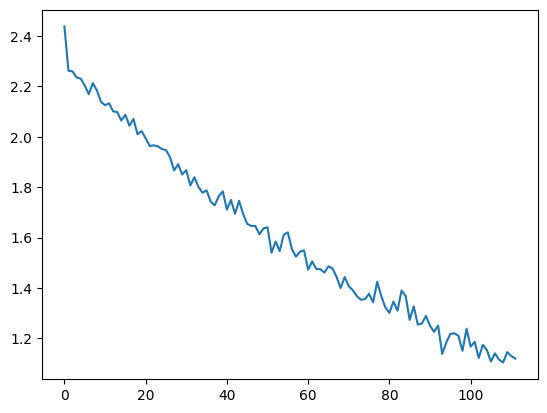

 48%|████▊     | 112/235 [00:26<00:28,  4.28it/s]

Batch 112: Loss = 1.0893, Accuracy = 0.8203


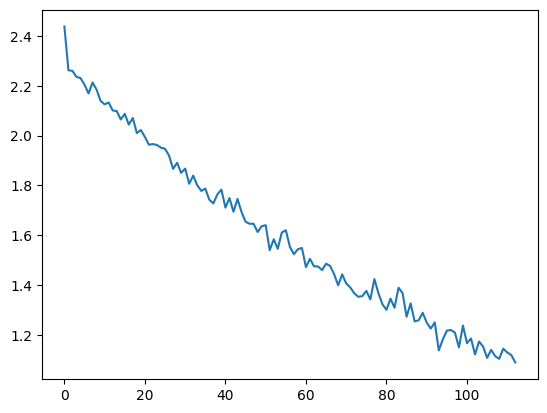

 48%|████▊     | 113/235 [00:27<00:28,  4.31it/s]

Batch 113: Loss = 1.0897, Accuracy = 0.7930


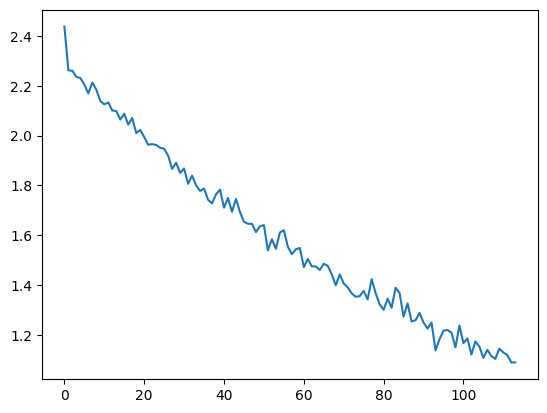

 49%|████▊     | 114/235 [00:27<00:28,  4.30it/s]

Batch 114: Loss = 1.0808, Accuracy = 0.8203


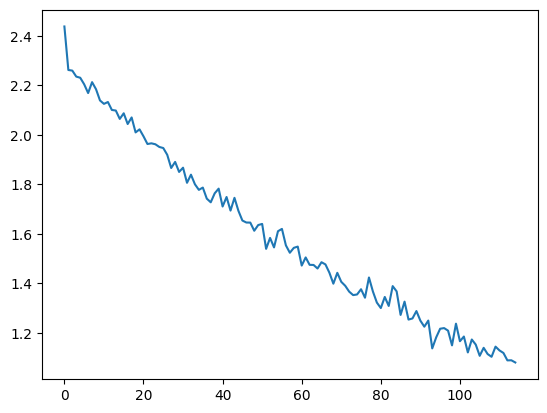

 49%|████▉     | 115/235 [00:27<00:27,  4.33it/s]

Batch 115: Loss = 1.0744, Accuracy = 0.7891


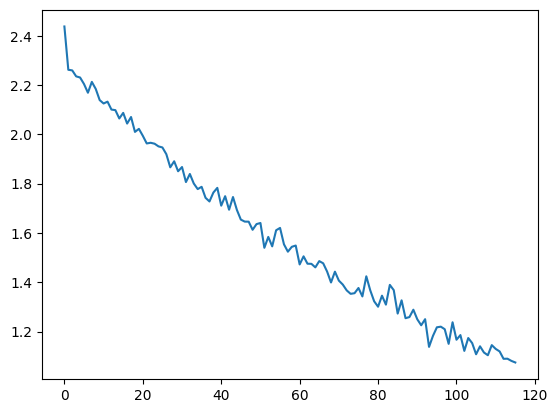

 49%|████▉     | 116/235 [00:27<00:27,  4.29it/s]

Batch 116: Loss = 1.1089, Accuracy = 0.7656


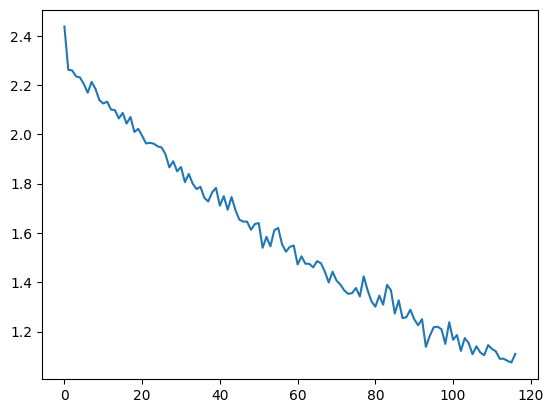

 50%|████▉     | 117/235 [00:28<00:27,  4.26it/s]

Batch 117: Loss = 1.0593, Accuracy = 0.8164


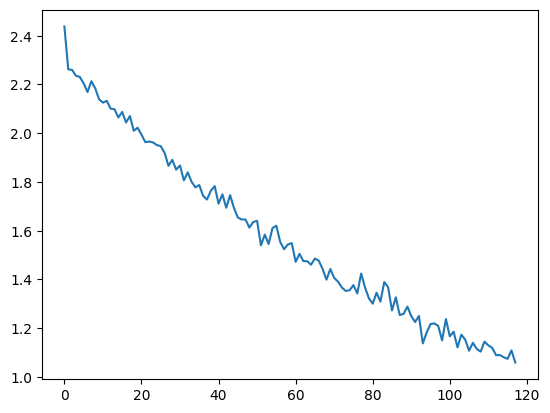

 50%|█████     | 118/235 [00:28<00:27,  4.24it/s]

Batch 118: Loss = 1.0215, Accuracy = 0.8125


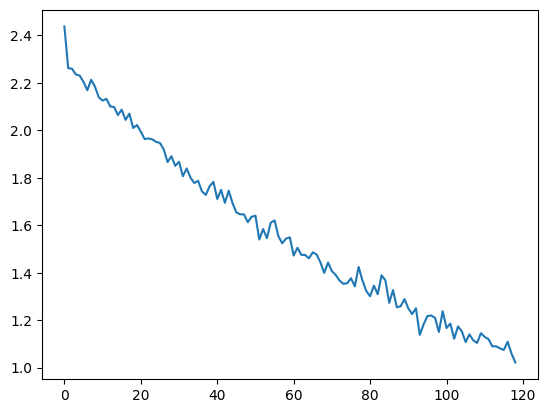

 51%|█████     | 119/235 [00:28<00:27,  4.21it/s]

Batch 119: Loss = 1.0477, Accuracy = 0.7891


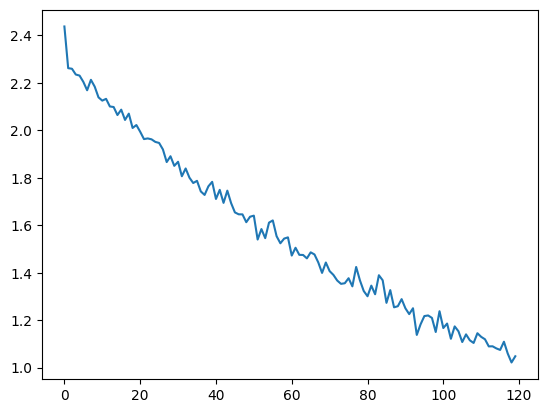

 51%|█████     | 120/235 [00:28<00:26,  4.29it/s]

Batch 120: Loss = 1.0817, Accuracy = 0.7852


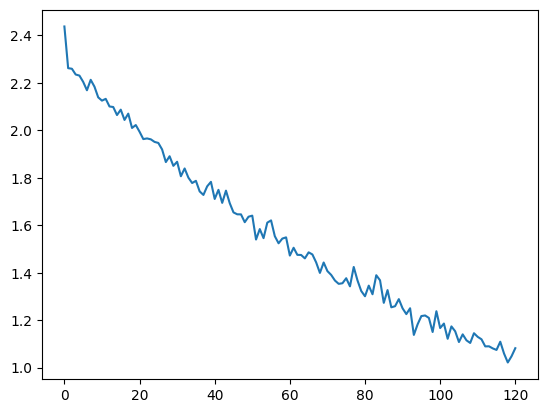

 51%|█████▏    | 121/235 [00:28<00:26,  4.31it/s]

Batch 121: Loss = 1.0318, Accuracy = 0.8086


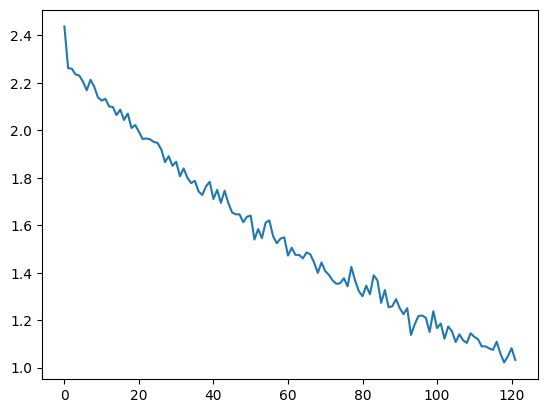

 52%|█████▏    | 122/235 [00:29<00:26,  4.25it/s]

Batch 122: Loss = 1.0799, Accuracy = 0.7539


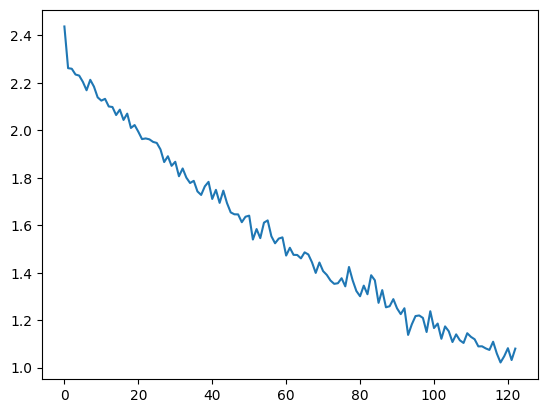

 52%|█████▏    | 123/235 [00:29<00:30,  3.73it/s]

Batch 123: Loss = 1.0168, Accuracy = 0.8047


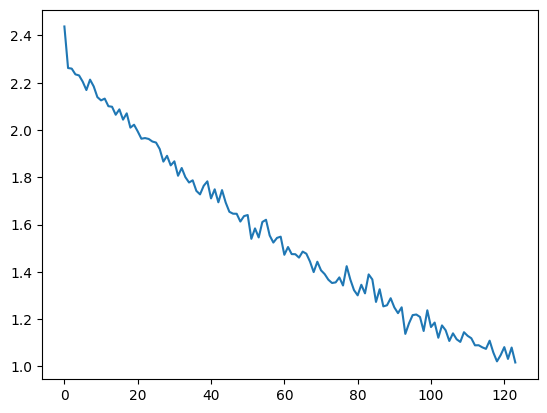

 53%|█████▎    | 124/235 [00:29<00:28,  3.86it/s]

Batch 124: Loss = 1.0606, Accuracy = 0.7852


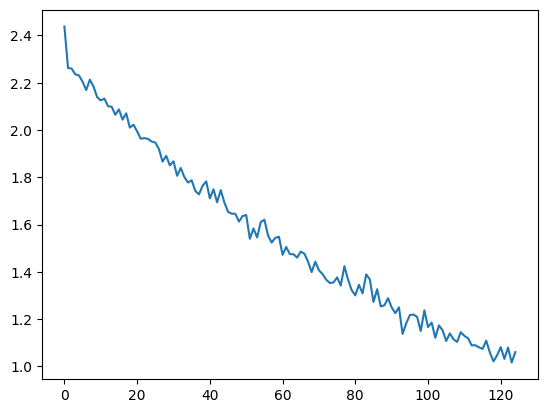

 53%|█████▎    | 125/235 [00:30<00:28,  3.82it/s]

Batch 125: Loss = 1.0426, Accuracy = 0.7930


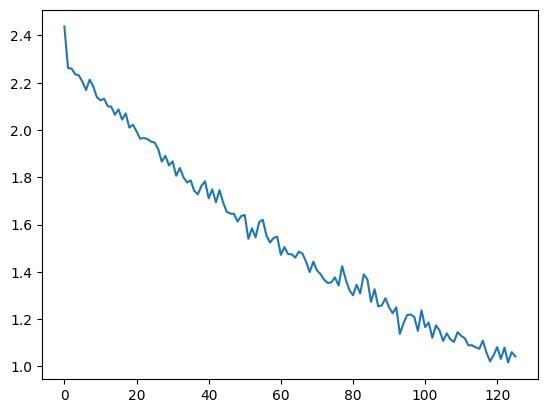

 54%|█████▎    | 126/235 [00:30<00:27,  3.92it/s]

Batch 126: Loss = 1.0344, Accuracy = 0.8398


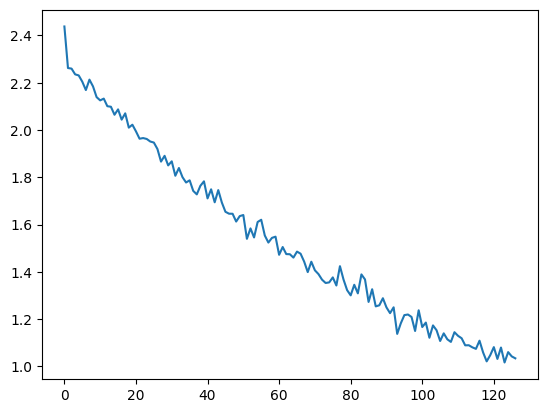

 54%|█████▍    | 127/235 [00:30<00:27,  3.99it/s]

Batch 127: Loss = 0.9883, Accuracy = 0.8047


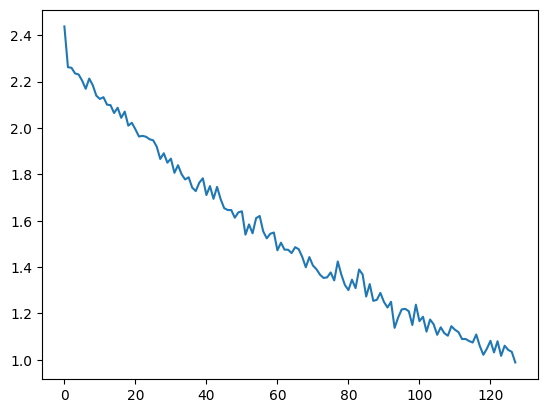

 54%|█████▍    | 128/235 [00:30<00:26,  4.00it/s]

Batch 128: Loss = 1.0126, Accuracy = 0.8125


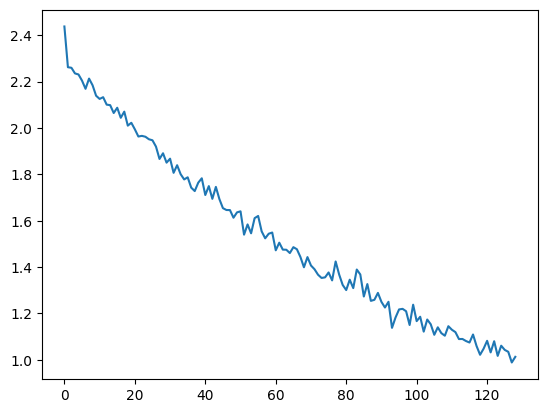

 55%|█████▍    | 129/235 [00:31<00:26,  4.03it/s]

Batch 129: Loss = 1.0798, Accuracy = 0.7891


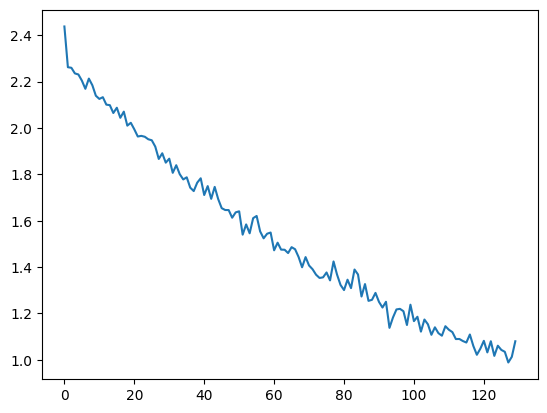

 55%|█████▌    | 130/235 [00:31<00:26,  4.02it/s]

Batch 130: Loss = 0.9449, Accuracy = 0.8398


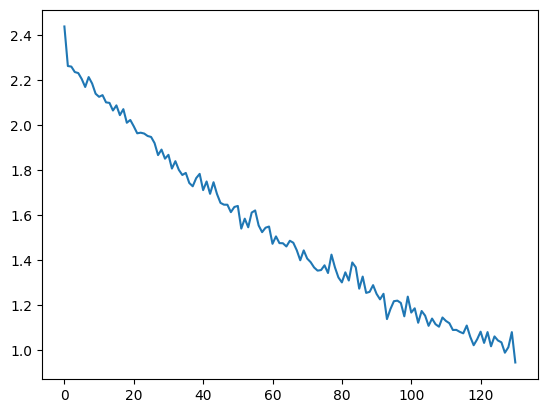

 56%|█████▌    | 131/235 [00:31<00:25,  4.03it/s]

Batch 131: Loss = 1.0136, Accuracy = 0.7734


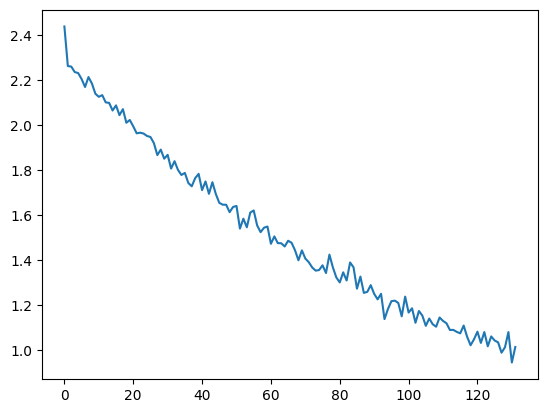

 56%|█████▌    | 132/235 [00:31<00:25,  4.08it/s]

Batch 132: Loss = 1.0378, Accuracy = 0.7891


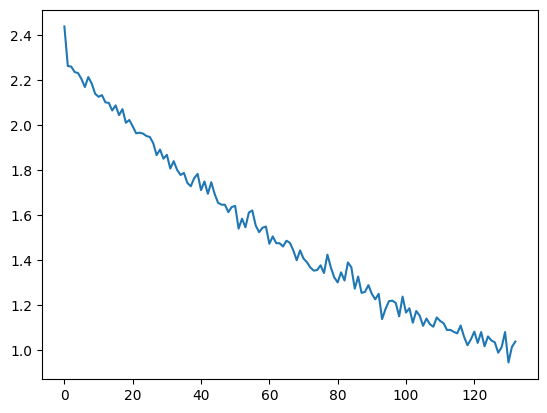

 57%|█████▋    | 133/235 [00:31<00:24,  4.09it/s]

Batch 133: Loss = 1.0307, Accuracy = 0.7773


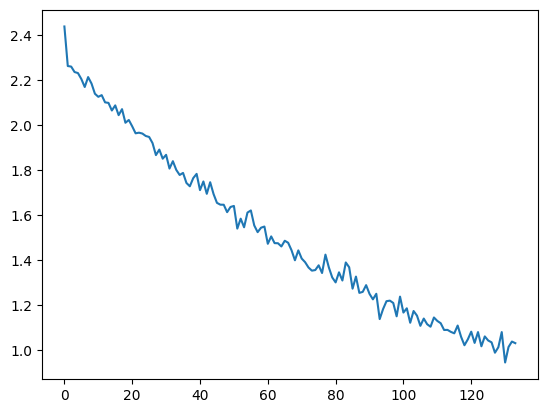

 57%|█████▋    | 134/235 [00:32<00:24,  4.11it/s]

Batch 134: Loss = 0.9816, Accuracy = 0.8164


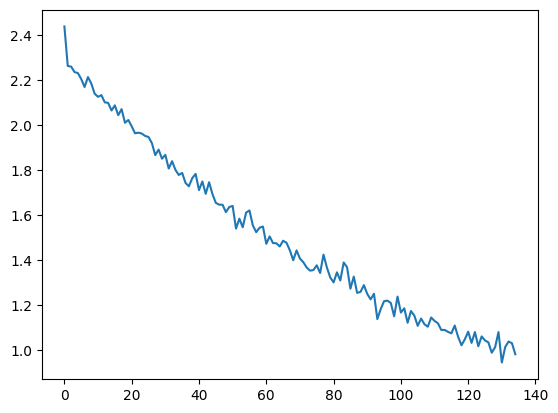

 57%|█████▋    | 135/235 [00:32<00:24,  4.07it/s]

Batch 135: Loss = 1.0151, Accuracy = 0.8203


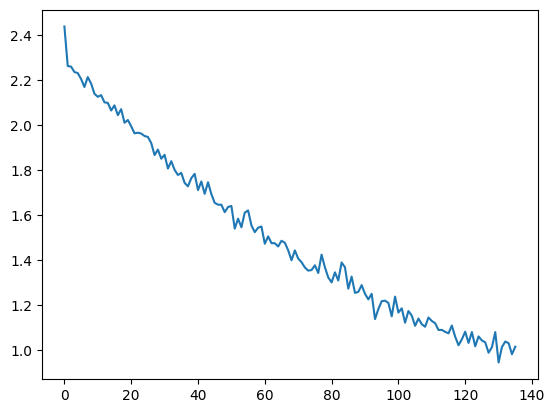

 58%|█████▊    | 136/235 [00:32<00:24,  4.06it/s]

Batch 136: Loss = 0.9359, Accuracy = 0.8438


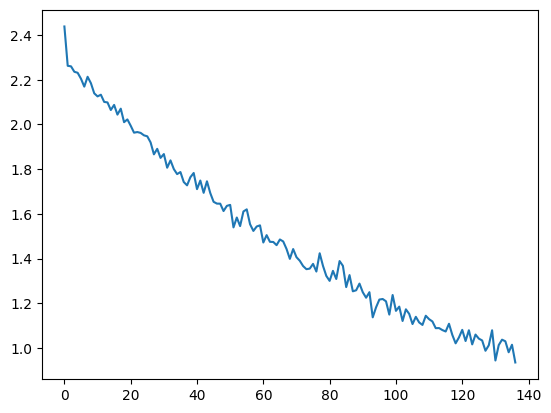

 58%|█████▊    | 137/235 [00:32<00:24,  4.02it/s]

Batch 137: Loss = 1.0614, Accuracy = 0.7734


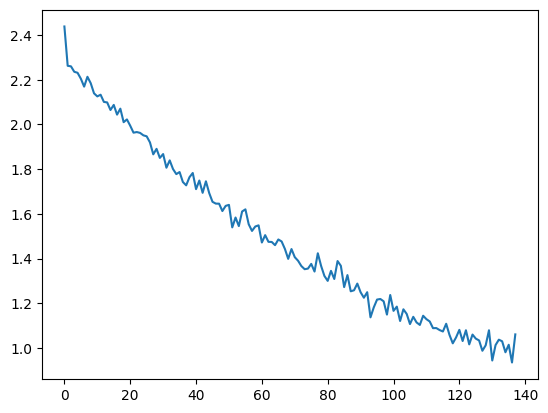

 59%|█████▊    | 138/235 [00:33<00:23,  4.07it/s]

Batch 138: Loss = 0.9801, Accuracy = 0.8164


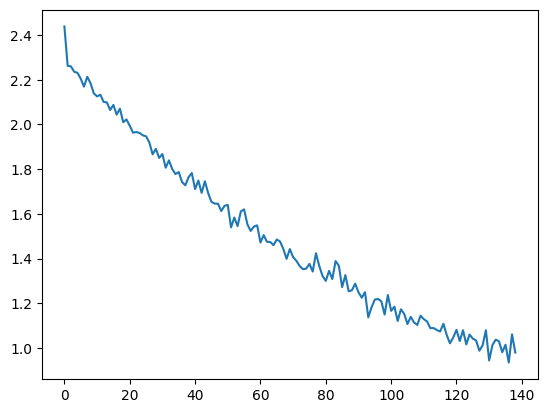

 59%|█████▉    | 139/235 [00:33<00:23,  4.13it/s]

Batch 139: Loss = 0.9661, Accuracy = 0.8047


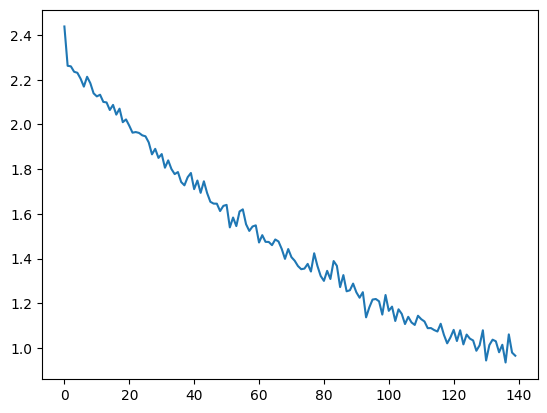

 60%|█████▉    | 140/235 [00:33<00:23,  4.06it/s]

Batch 140: Loss = 1.0037, Accuracy = 0.8398


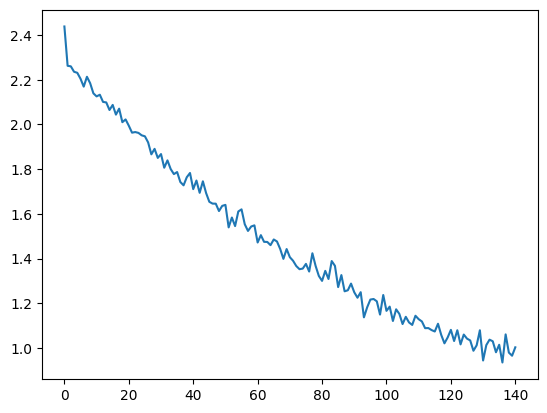

 60%|██████    | 141/235 [00:33<00:23,  4.03it/s]

Batch 141: Loss = 0.9787, Accuracy = 0.7773


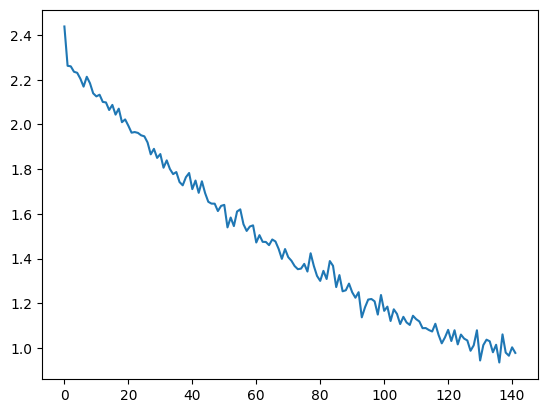

 60%|██████    | 142/235 [00:34<00:26,  3.52it/s]

Batch 142: Loss = 0.9685, Accuracy = 0.7852


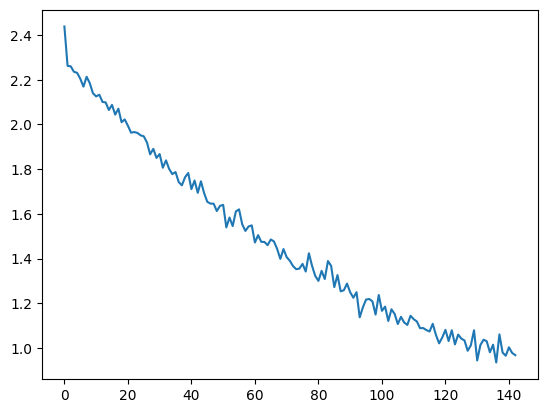

 61%|██████    | 143/235 [00:34<00:25,  3.66it/s]

Batch 143: Loss = 0.9461, Accuracy = 0.8125


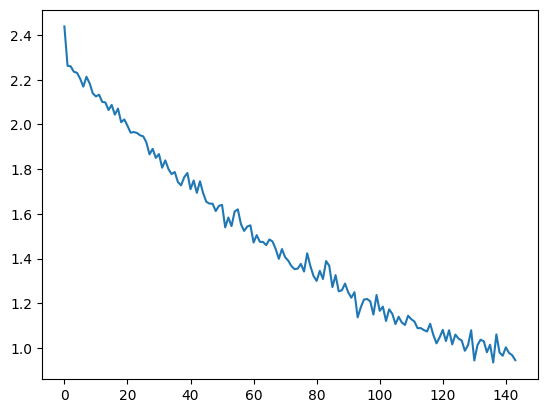

 61%|██████▏   | 144/235 [00:34<00:24,  3.74it/s]

Batch 144: Loss = 0.9223, Accuracy = 0.7930


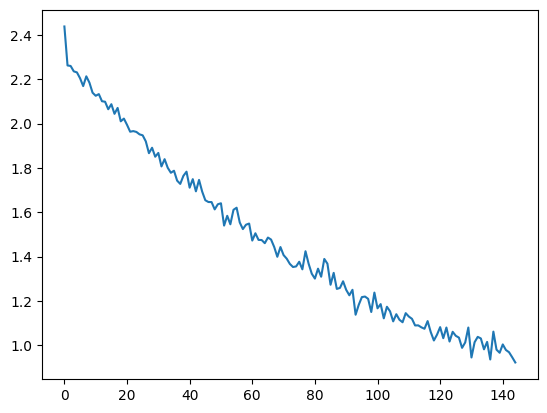

 62%|██████▏   | 145/235 [00:35<00:23,  3.86it/s]

Batch 145: Loss = 1.0107, Accuracy = 0.8008


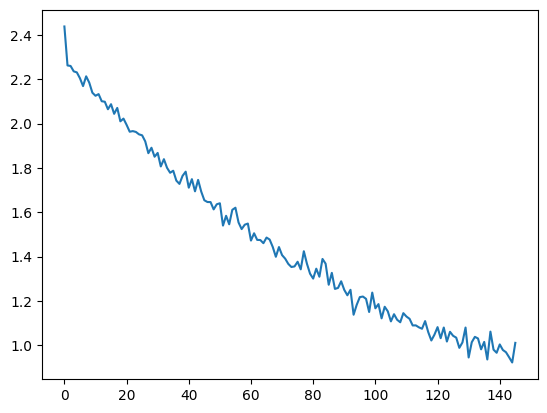

 62%|██████▏   | 146/235 [00:35<00:22,  3.89it/s]

Batch 146: Loss = 0.9448, Accuracy = 0.8086


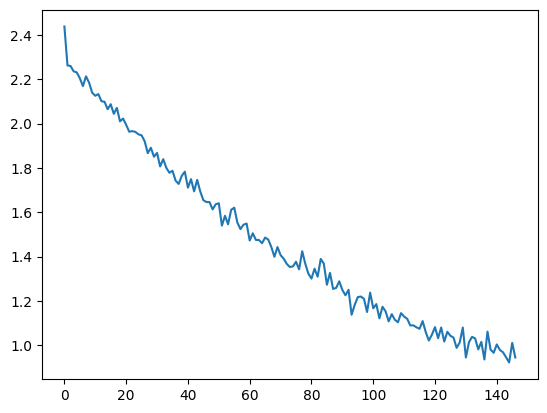

 63%|██████▎   | 147/235 [00:35<00:22,  3.99it/s]

Batch 147: Loss = 0.9684, Accuracy = 0.8125


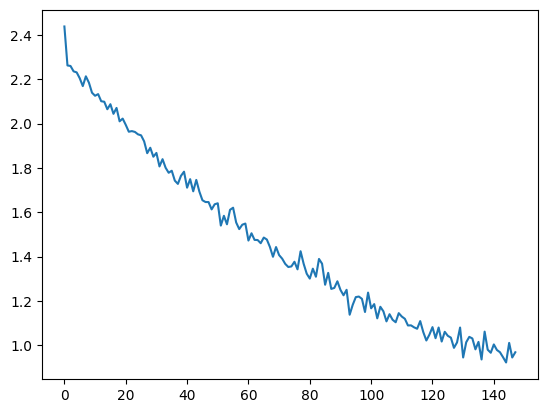

 63%|██████▎   | 148/235 [00:35<00:21,  4.02it/s]

Batch 148: Loss = 0.8799, Accuracy = 0.8203


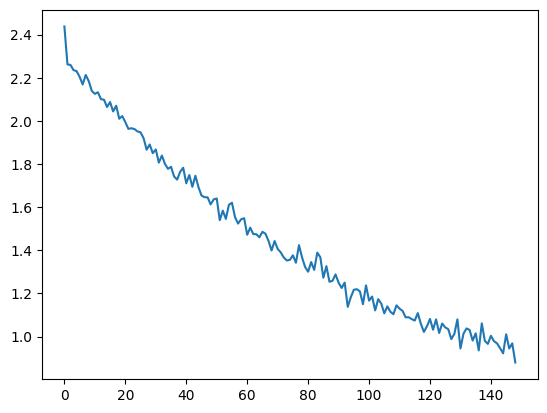

 63%|██████▎   | 149/235 [00:36<00:21,  4.09it/s]

Batch 149: Loss = 0.9076, Accuracy = 0.8242


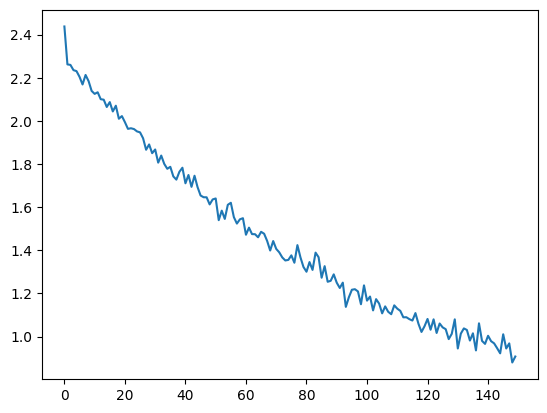

 64%|██████▍   | 150/235 [00:36<00:20,  4.12it/s]

Batch 150: Loss = 0.9328, Accuracy = 0.8281


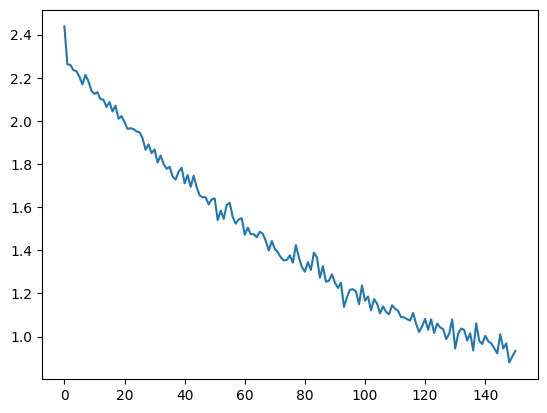

 64%|██████▍   | 151/235 [00:36<00:20,  4.18it/s]

Batch 151: Loss = 0.9093, Accuracy = 0.8516


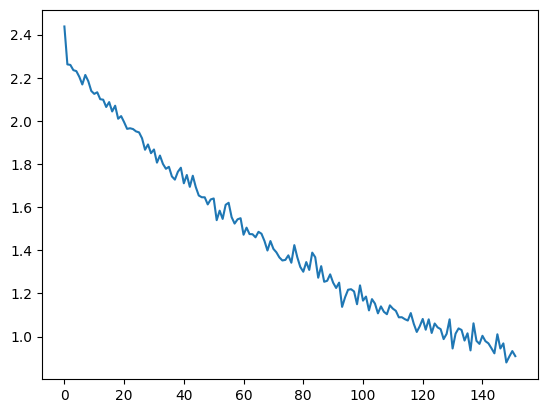

 65%|██████▍   | 152/235 [00:36<00:19,  4.16it/s]

Batch 152: Loss = 0.8923, Accuracy = 0.8008


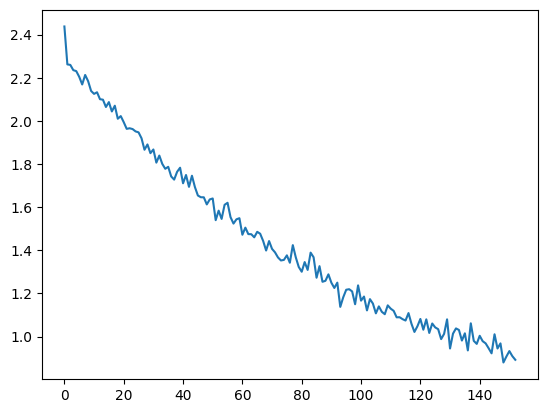

 65%|██████▌   | 153/235 [00:37<00:19,  4.12it/s]

Batch 153: Loss = 0.9406, Accuracy = 0.7812


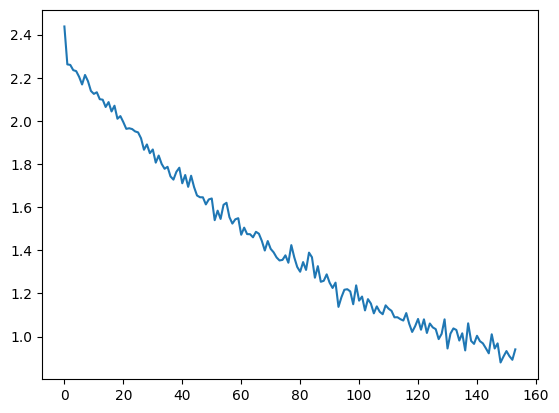

 66%|██████▌   | 154/235 [00:37<00:19,  4.05it/s]

Batch 154: Loss = 0.8459, Accuracy = 0.8594


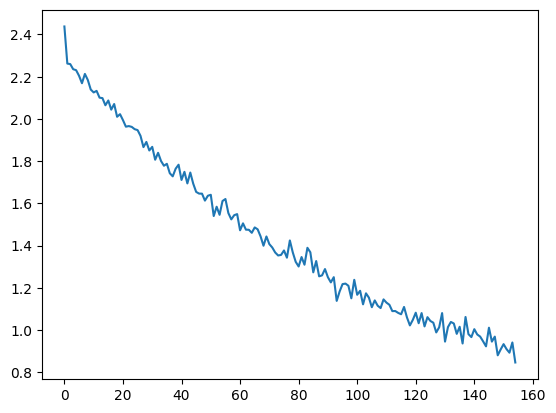

 66%|██████▌   | 155/235 [00:37<00:19,  4.07it/s]

Batch 155: Loss = 0.9478, Accuracy = 0.7695


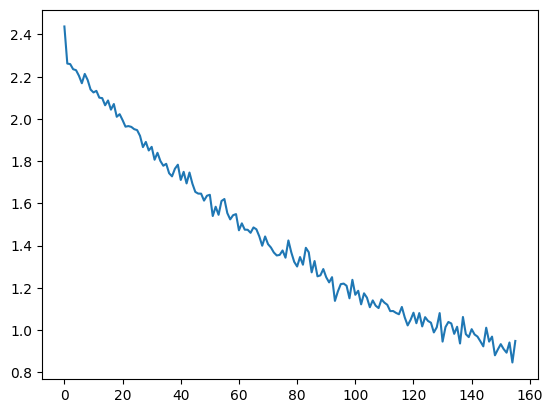

 66%|██████▋   | 156/235 [00:37<00:19,  4.01it/s]

Batch 156: Loss = 0.8806, Accuracy = 0.8242


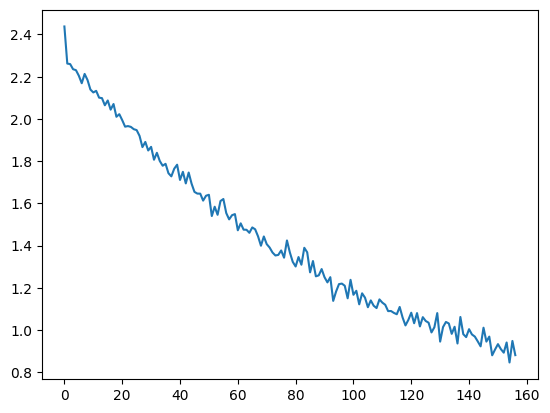

 67%|██████▋   | 157/235 [00:38<00:19,  3.98it/s]

Batch 157: Loss = 0.9145, Accuracy = 0.8359


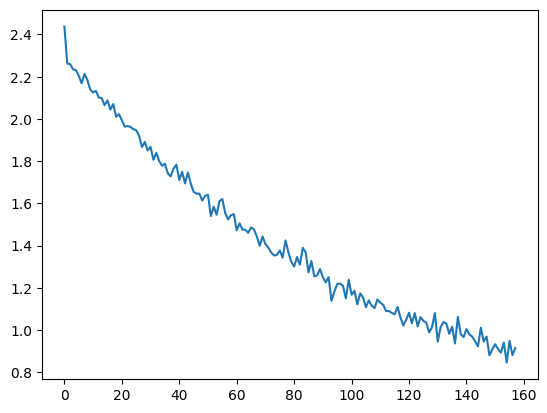

 67%|██████▋   | 158/235 [00:38<00:19,  3.93it/s]

Batch 158: Loss = 0.8108, Accuracy = 0.8477


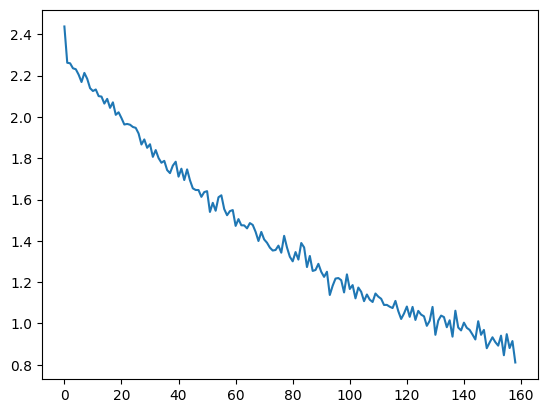

 68%|██████▊   | 159/235 [00:38<00:19,  4.00it/s]

Batch 159: Loss = 0.9350, Accuracy = 0.7734


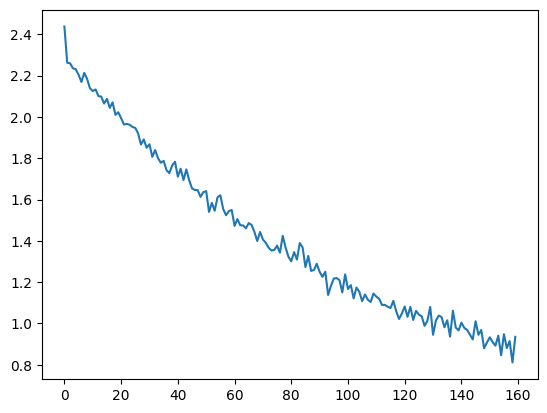

 68%|██████▊   | 160/235 [00:38<00:18,  4.04it/s]

Batch 160: Loss = 0.9229, Accuracy = 0.7930


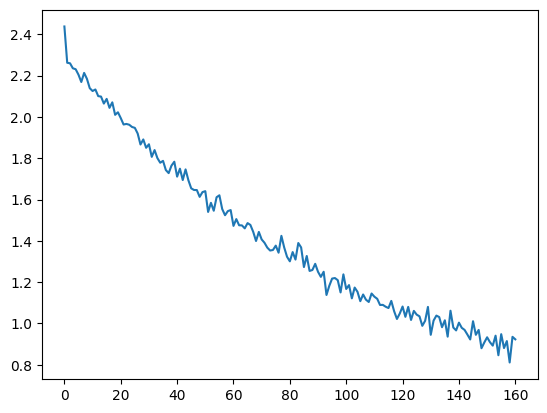

 69%|██████▊   | 161/235 [00:39<00:21,  3.52it/s]

Batch 161: Loss = 0.9293, Accuracy = 0.8047


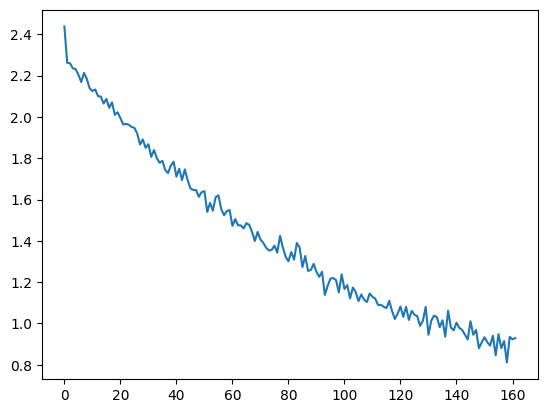

 69%|██████▉   | 162/235 [00:39<00:20,  3.65it/s]

Batch 162: Loss = 0.8498, Accuracy = 0.8203


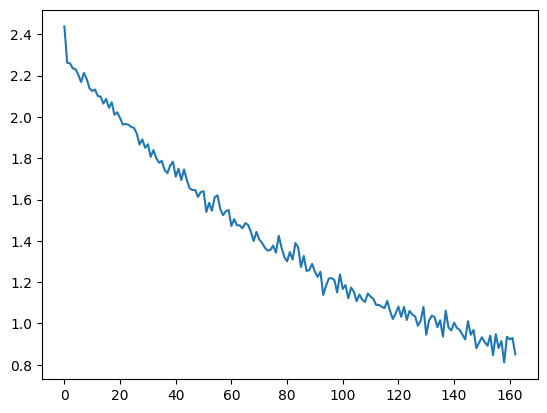

 69%|██████▉   | 163/235 [00:39<00:19,  3.78it/s]

Batch 163: Loss = 0.8694, Accuracy = 0.8359


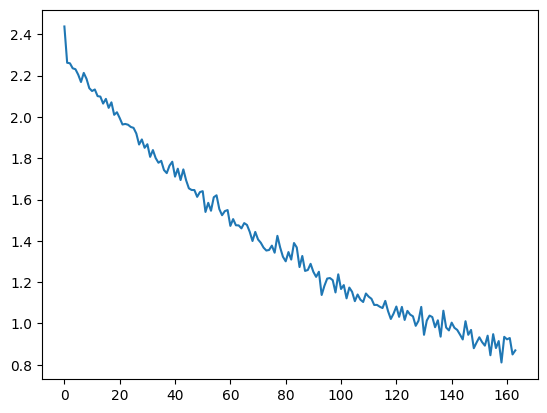

 70%|██████▉   | 164/235 [00:39<00:18,  3.84it/s]

Batch 164: Loss = 0.8840, Accuracy = 0.8398


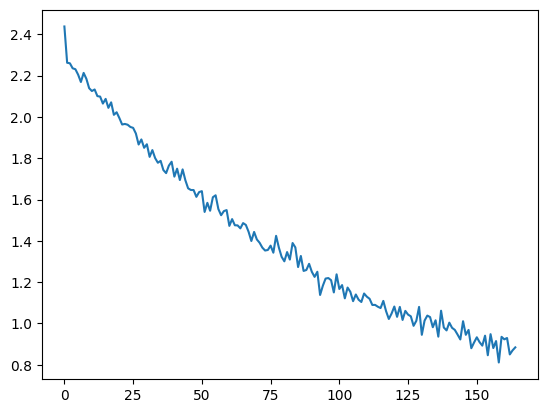

 70%|███████   | 165/235 [00:40<00:18,  3.77it/s]

Batch 165: Loss = 0.8799, Accuracy = 0.8164


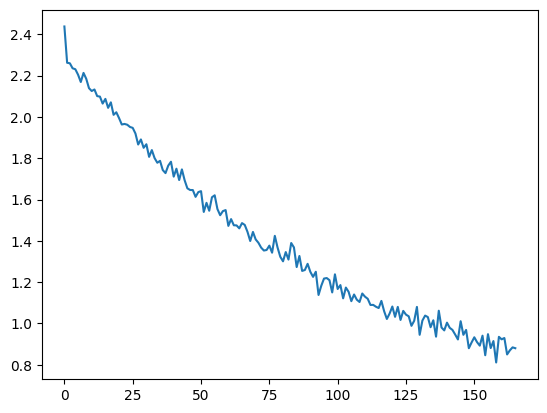

 71%|███████   | 166/235 [00:40<00:17,  3.86it/s]

Batch 166: Loss = 0.9137, Accuracy = 0.7930


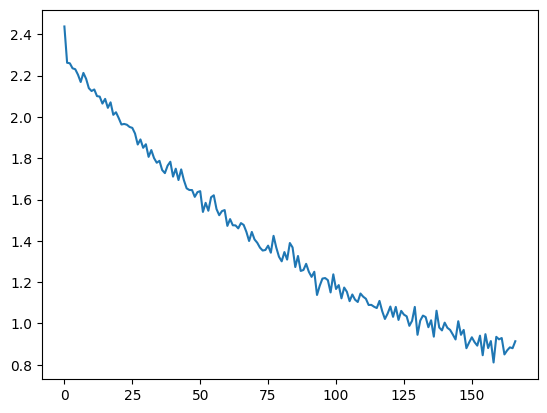

 71%|███████   | 167/235 [00:40<00:17,  3.91it/s]

Batch 167: Loss = 0.9015, Accuracy = 0.8086


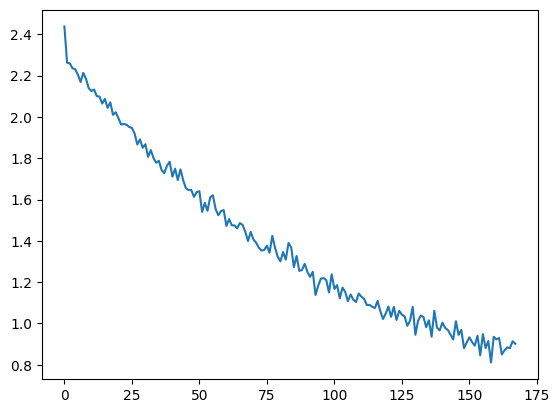

 71%|███████▏  | 168/235 [00:40<00:16,  3.94it/s]

Batch 168: Loss = 0.9056, Accuracy = 0.8047


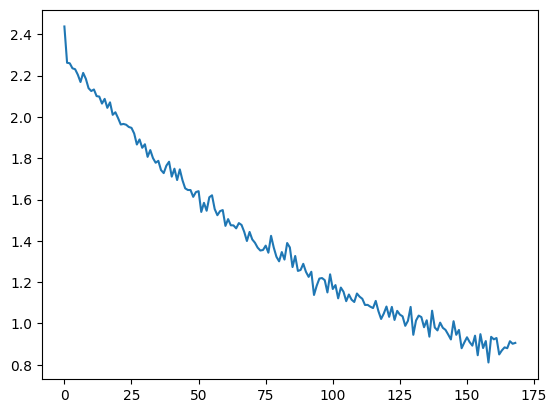

 72%|███████▏  | 169/235 [00:41<00:16,  3.94it/s]

Batch 169: Loss = 0.9107, Accuracy = 0.8164


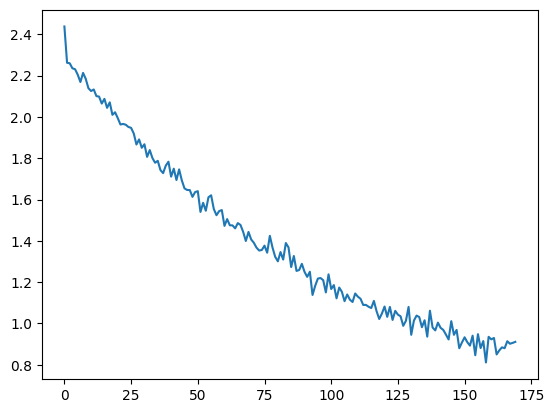

 72%|███████▏  | 170/235 [00:41<00:16,  4.00it/s]

Batch 170: Loss = 0.9585, Accuracy = 0.7578


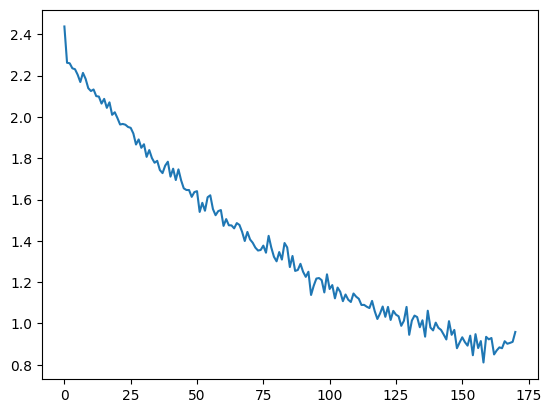

 73%|███████▎  | 171/235 [00:41<00:15,  4.05it/s]

Batch 171: Loss = 0.8291, Accuracy = 0.8086


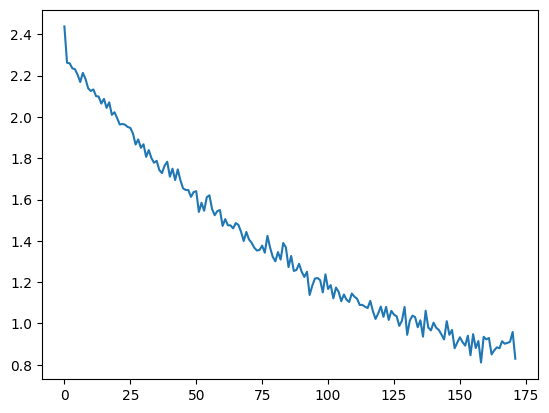

 73%|███████▎  | 172/235 [00:41<00:15,  4.02it/s]

Batch 172: Loss = 0.9595, Accuracy = 0.7969


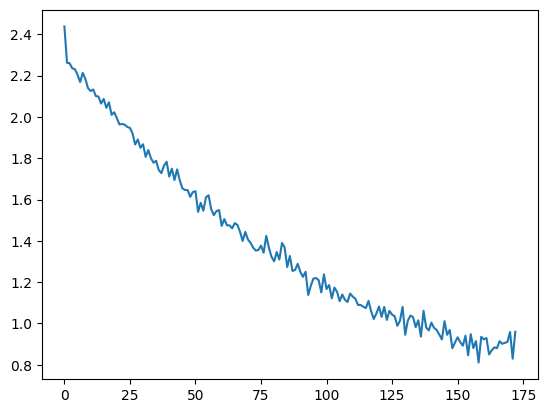

 74%|███████▎  | 173/235 [00:42<00:15,  4.06it/s]

Batch 173: Loss = 0.8352, Accuracy = 0.8281


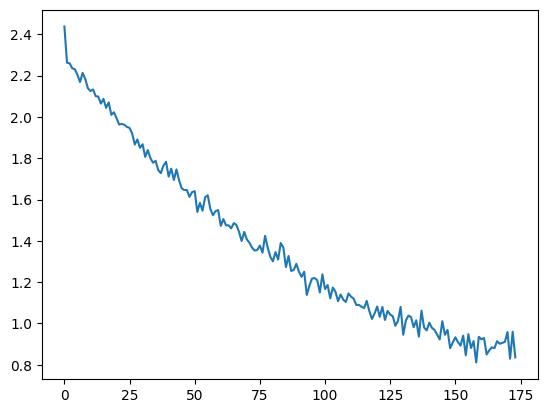

 74%|███████▍  | 174/235 [00:42<00:15,  4.04it/s]

Batch 174: Loss = 0.8318, Accuracy = 0.8398


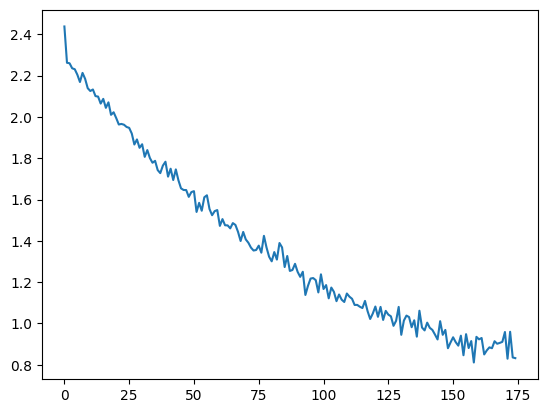

 74%|███████▍  | 175/235 [00:42<00:14,  4.02it/s]

Batch 175: Loss = 0.7984, Accuracy = 0.8438


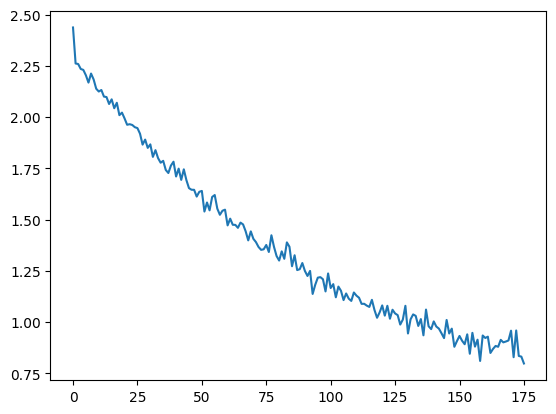

 75%|███████▍  | 176/235 [00:42<00:14,  3.99it/s]

Batch 176: Loss = 0.7802, Accuracy = 0.8672


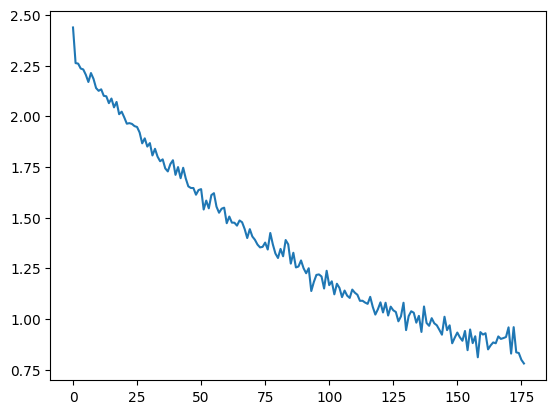

 75%|███████▌  | 177/235 [00:43<00:14,  4.02it/s]

Batch 177: Loss = 0.8456, Accuracy = 0.8047


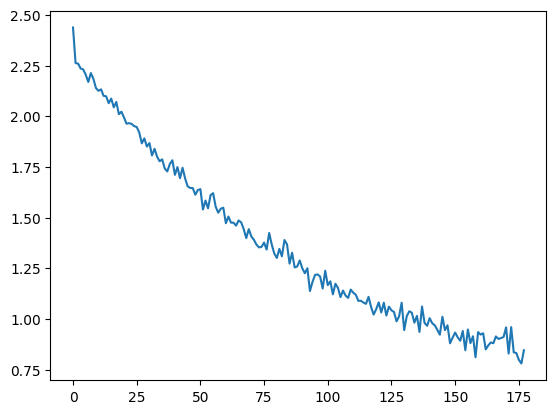

 76%|███████▌  | 178/235 [00:43<00:14,  4.00it/s]

Batch 178: Loss = 0.9117, Accuracy = 0.7891


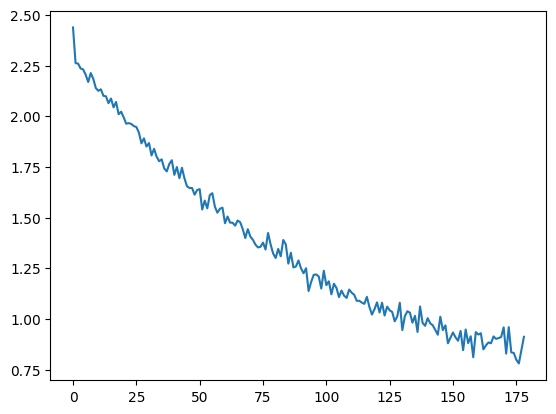

 76%|███████▌  | 179/235 [00:43<00:15,  3.58it/s]

Batch 179: Loss = 0.8822, Accuracy = 0.8203


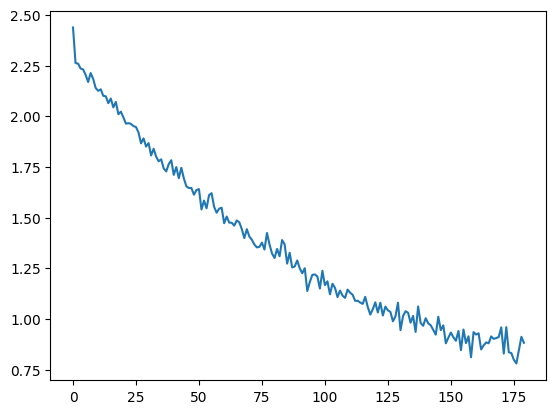

 77%|███████▋  | 180/235 [00:43<00:14,  3.71it/s]

Batch 180: Loss = 0.8270, Accuracy = 0.8398


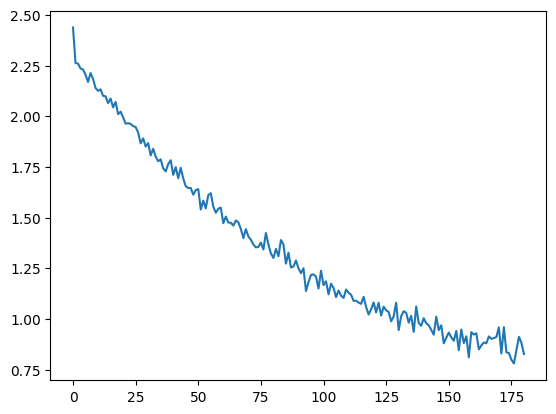

 77%|███████▋  | 181/235 [00:44<00:14,  3.80it/s]

Batch 181: Loss = 0.9143, Accuracy = 0.8008


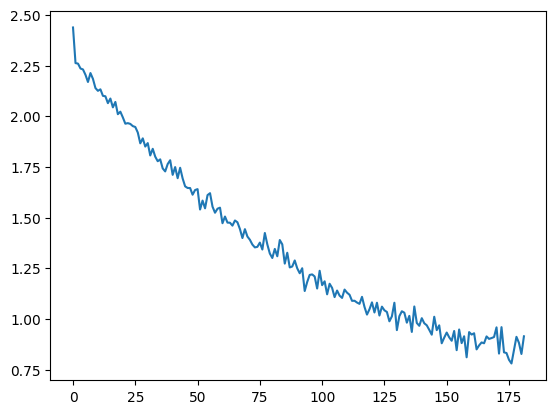

 77%|███████▋  | 182/235 [00:44<00:13,  3.85it/s]

Batch 182: Loss = 0.8398, Accuracy = 0.8281


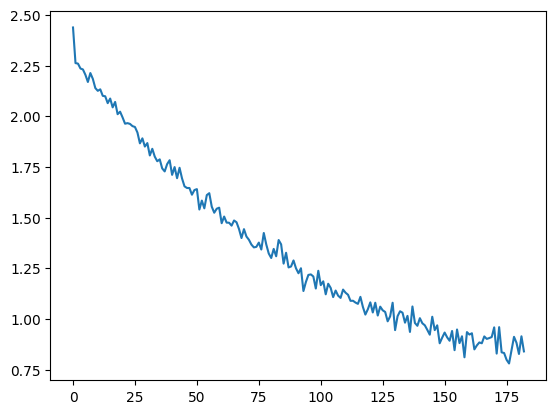

 78%|███████▊  | 183/235 [00:44<00:13,  3.90it/s]

Batch 183: Loss = 0.8261, Accuracy = 0.8359


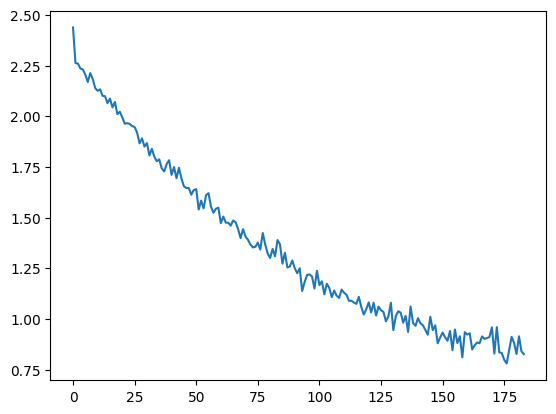

 78%|███████▊  | 184/235 [00:44<00:12,  3.97it/s]

Batch 184: Loss = 0.8342, Accuracy = 0.8203


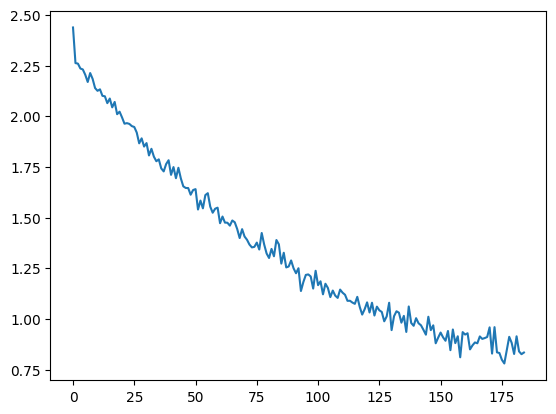

 79%|███████▊  | 185/235 [00:45<00:12,  3.98it/s]

Batch 185: Loss = 0.8078, Accuracy = 0.8242


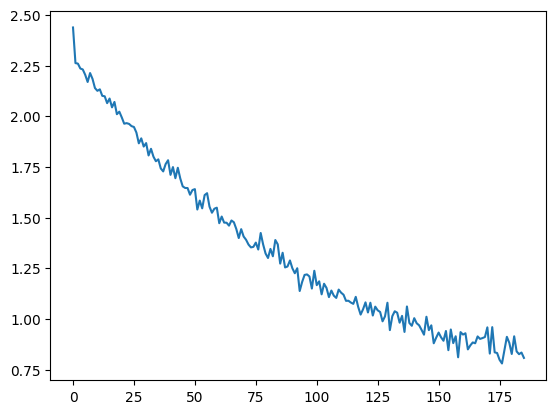

 79%|███████▉  | 186/235 [00:45<00:12,  3.96it/s]

Batch 186: Loss = 0.7907, Accuracy = 0.8398


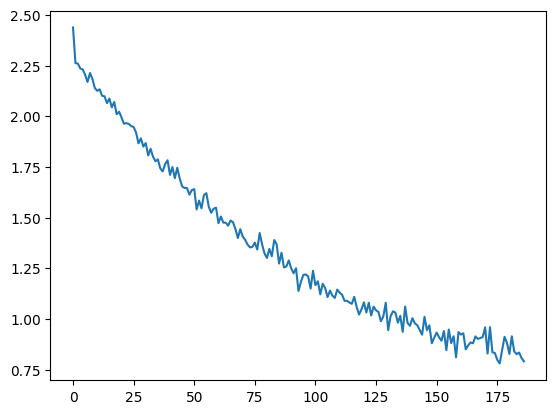

 80%|███████▉  | 187/235 [00:45<00:11,  4.00it/s]

Batch 187: Loss = 0.8519, Accuracy = 0.8047


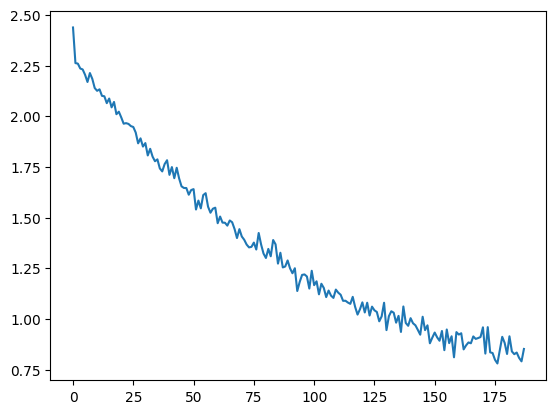

 80%|████████  | 188/235 [00:45<00:11,  4.01it/s]

Batch 188: Loss = 0.8166, Accuracy = 0.8398


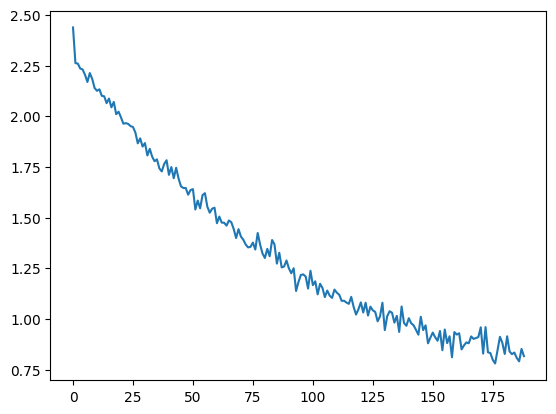

 80%|████████  | 189/235 [00:46<00:11,  4.09it/s]

Batch 189: Loss = 0.8368, Accuracy = 0.8086


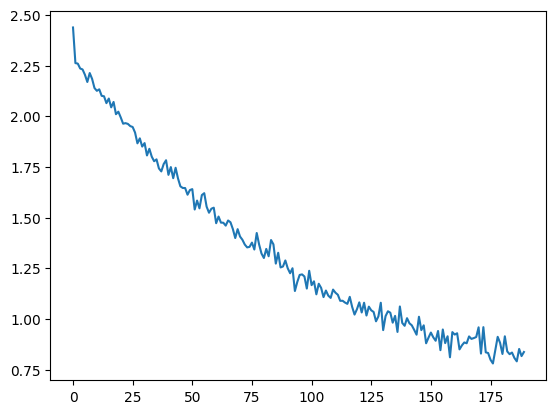

 81%|████████  | 190/235 [00:46<00:11,  4.02it/s]

Batch 190: Loss = 0.7510, Accuracy = 0.8594


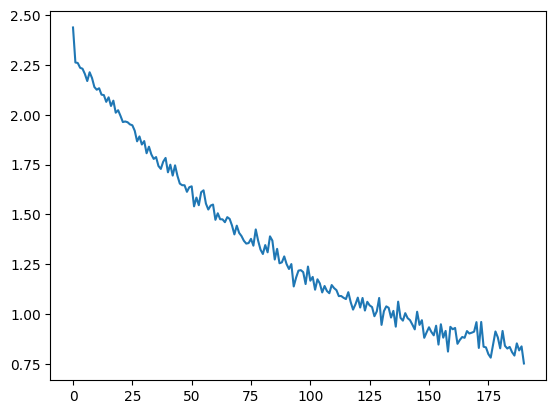

 81%|████████▏ | 191/235 [00:46<00:10,  4.02it/s]

Batch 191: Loss = 0.7765, Accuracy = 0.8398


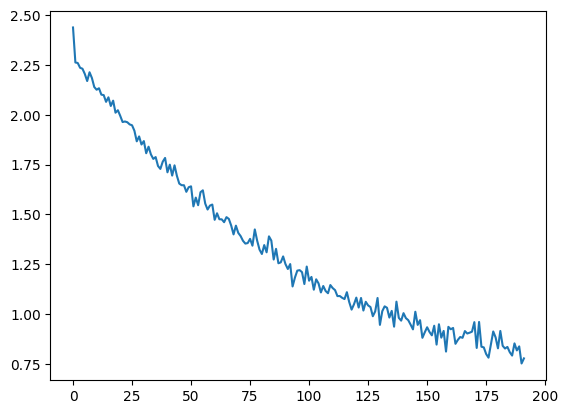

 82%|████████▏ | 192/235 [00:46<00:10,  3.97it/s]

Batch 192: Loss = 0.8085, Accuracy = 0.8477


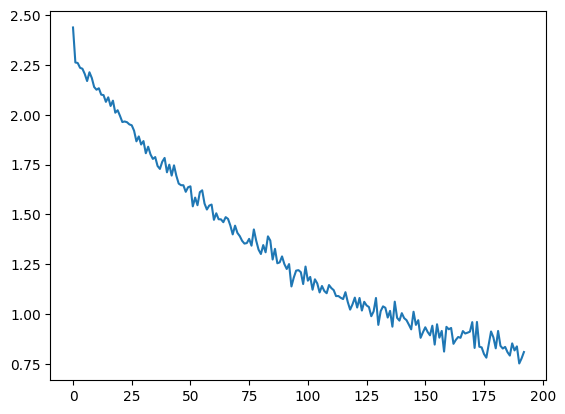

 82%|████████▏ | 193/235 [00:47<00:10,  3.96it/s]

Batch 193: Loss = 0.7215, Accuracy = 0.8477


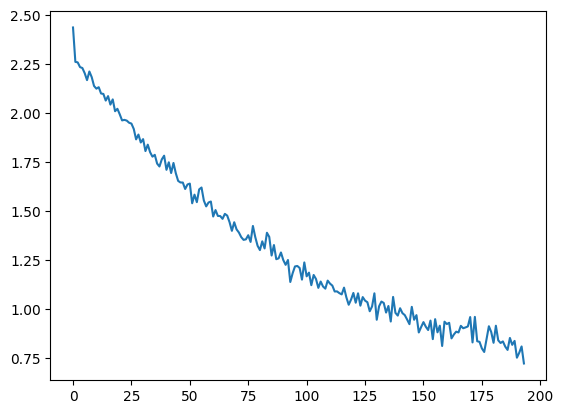

 83%|████████▎ | 194/235 [00:47<00:10,  3.97it/s]

Batch 194: Loss = 0.7967, Accuracy = 0.8281


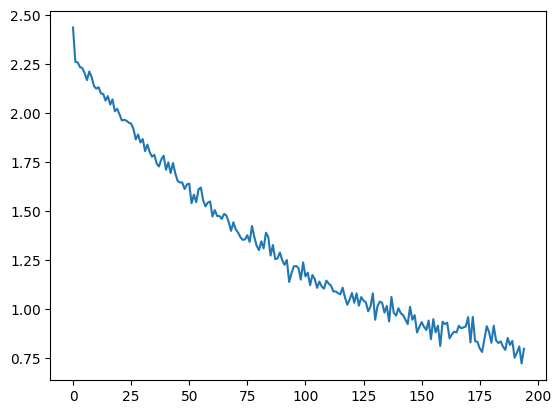

 83%|████████▎ | 195/235 [00:47<00:10,  3.96it/s]

Batch 195: Loss = 0.8469, Accuracy = 0.8125


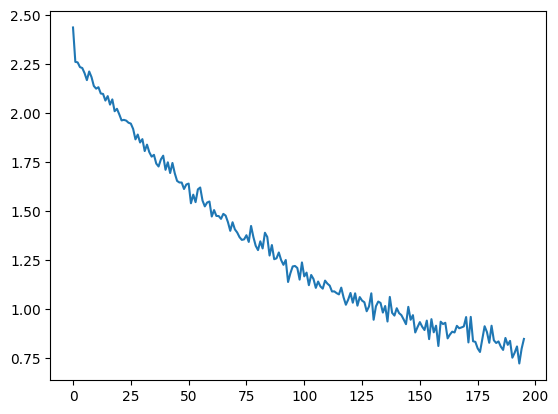

 83%|████████▎ | 196/235 [00:47<00:09,  4.00it/s]

Batch 196: Loss = 0.8685, Accuracy = 0.8164


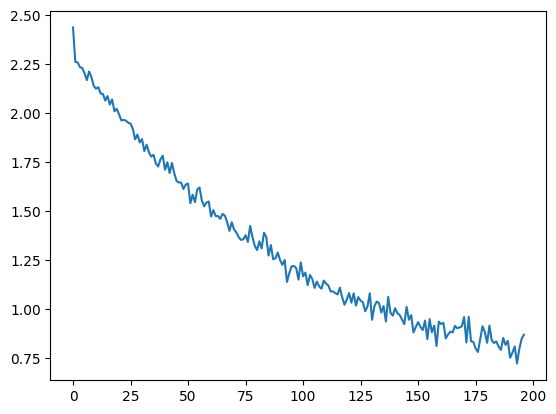

 84%|████████▍ | 197/235 [00:48<00:09,  4.00it/s]

Batch 197: Loss = 0.7941, Accuracy = 0.8203


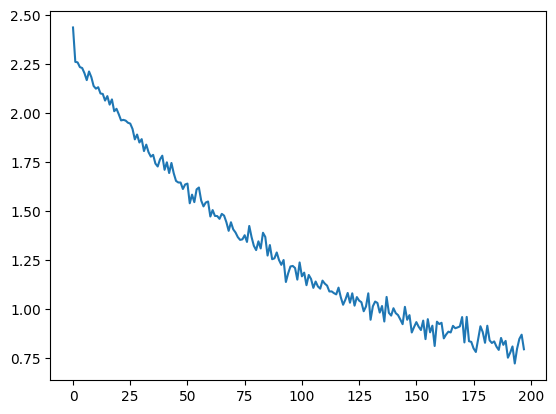

 84%|████████▍ | 198/235 [00:48<00:09,  4.03it/s]

Batch 198: Loss = 0.7931, Accuracy = 0.8750


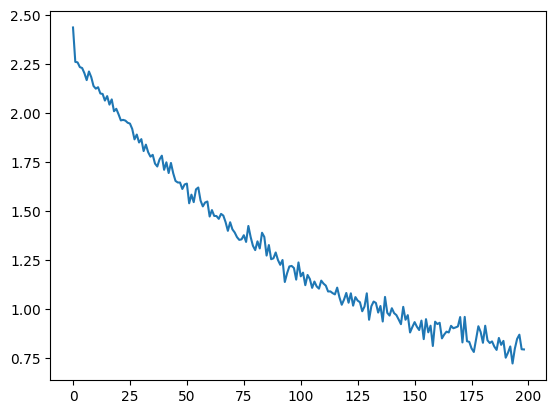

 85%|████████▍ | 199/235 [00:48<00:10,  3.53it/s]

Batch 199: Loss = 0.7324, Accuracy = 0.8359


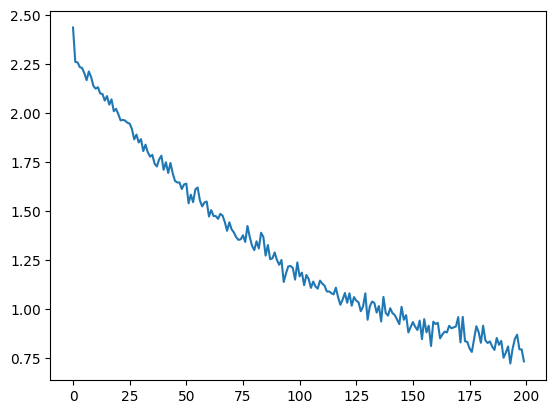

 85%|████████▌ | 200/235 [00:49<00:09,  3.62it/s]

Batch 200: Loss = 0.8119, Accuracy = 0.8281


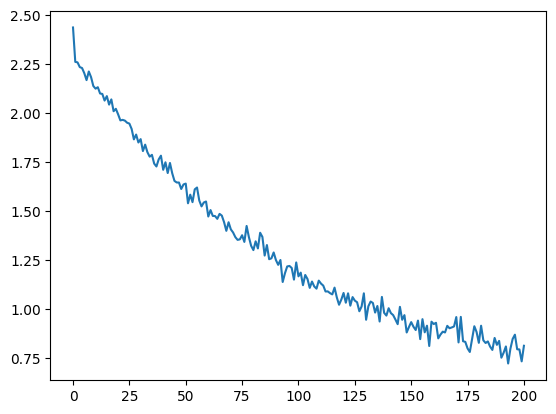

 86%|████████▌ | 201/235 [00:49<00:09,  3.69it/s]

Batch 201: Loss = 0.6550, Accuracy = 0.9062


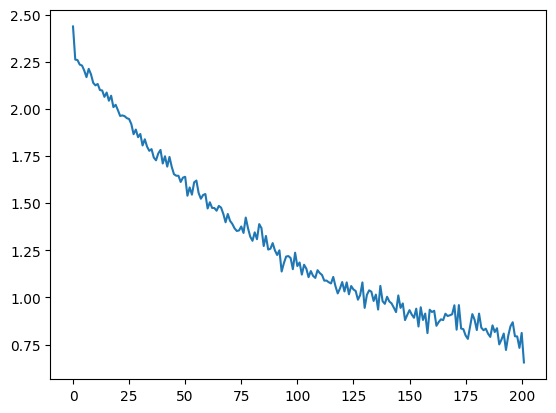

 86%|████████▌ | 202/235 [00:49<00:08,  3.70it/s]

Batch 202: Loss = 0.7849, Accuracy = 0.8477


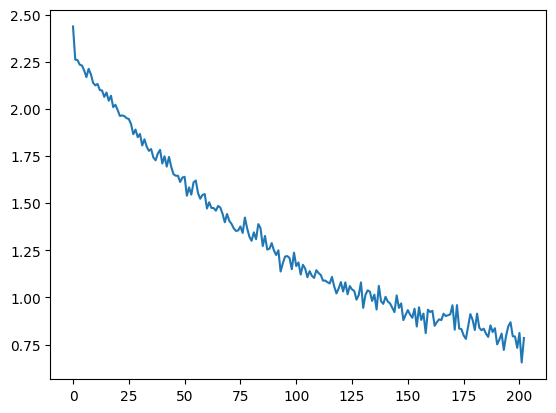

 86%|████████▋ | 203/235 [00:49<00:08,  3.78it/s]

Batch 203: Loss = 0.7567, Accuracy = 0.8320


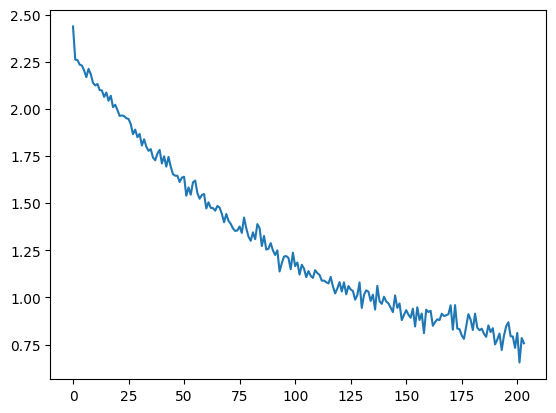

 87%|████████▋ | 204/235 [00:50<00:08,  3.74it/s]

Batch 204: Loss = 0.7782, Accuracy = 0.8438


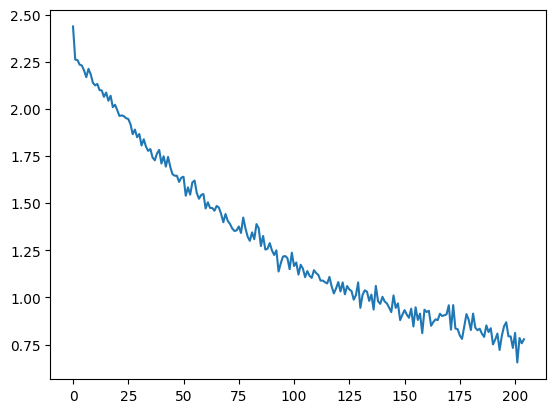

 87%|████████▋ | 205/235 [00:50<00:08,  3.74it/s]

Batch 205: Loss = 0.8419, Accuracy = 0.7891


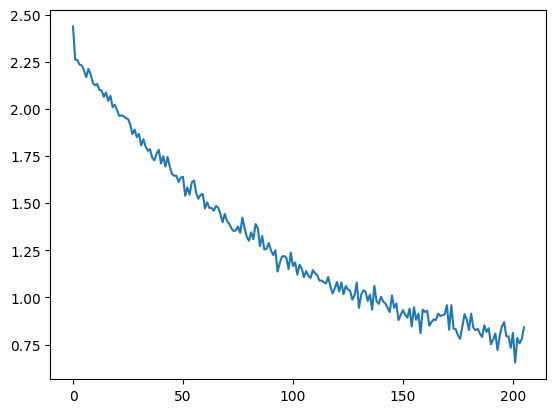

 88%|████████▊ | 206/235 [00:50<00:07,  3.85it/s]

Batch 206: Loss = 0.7653, Accuracy = 0.8320


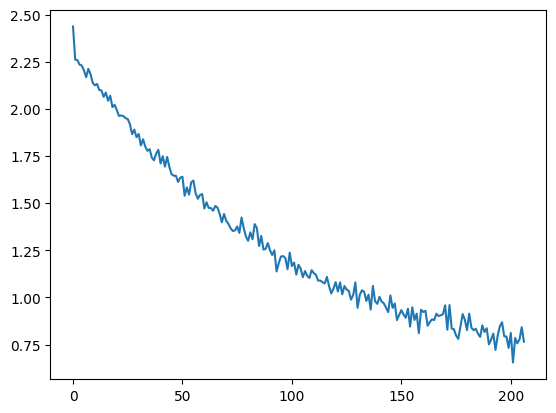

 88%|████████▊ | 207/235 [00:50<00:07,  3.94it/s]

Batch 207: Loss = 0.7978, Accuracy = 0.8125


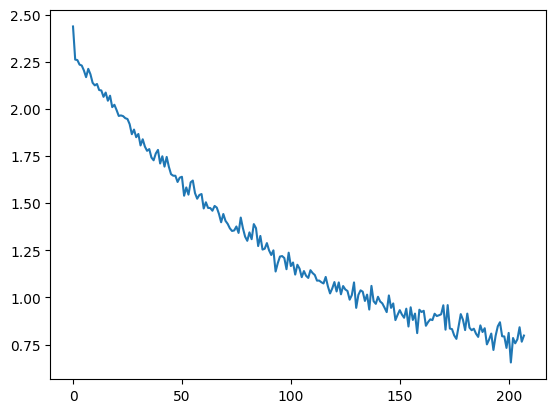

 89%|████████▊ | 208/235 [00:51<00:06,  4.00it/s]

Batch 208: Loss = 0.7460, Accuracy = 0.8516


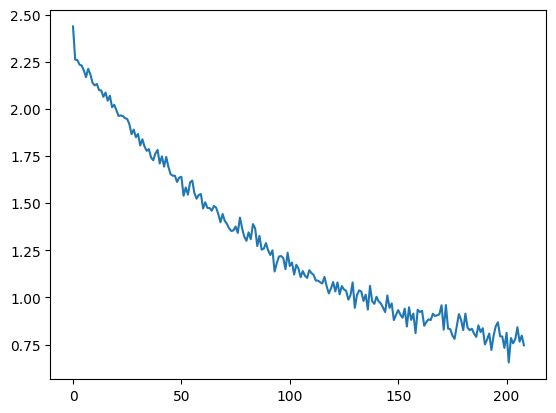

 89%|████████▉ | 209/235 [00:51<00:06,  4.06it/s]

Batch 209: Loss = 0.7609, Accuracy = 0.8164


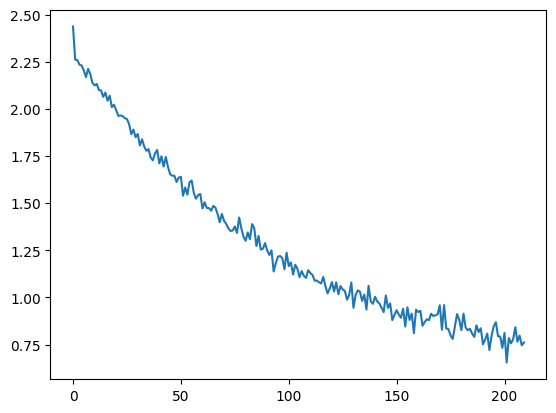

 89%|████████▉ | 210/235 [00:51<00:06,  4.10it/s]

Batch 210: Loss = 0.7682, Accuracy = 0.8242


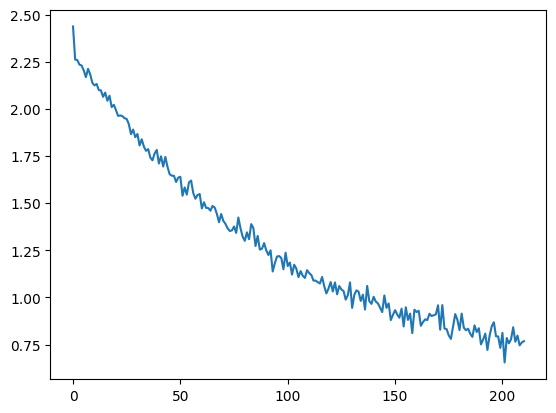

 90%|████████▉ | 211/235 [00:51<00:05,  4.12it/s]

Batch 211: Loss = 0.6661, Accuracy = 0.8711


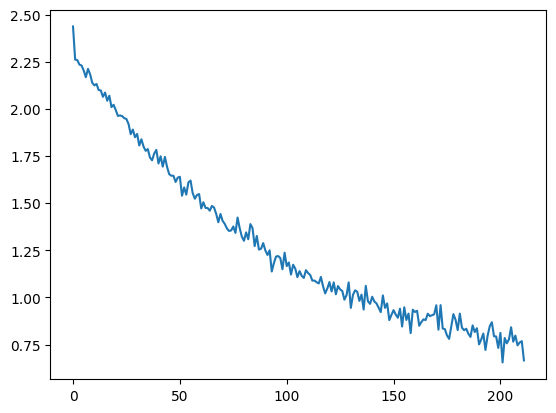

 90%|█████████ | 212/235 [00:52<00:05,  4.13it/s]

Batch 212: Loss = 0.6969, Accuracy = 0.8555


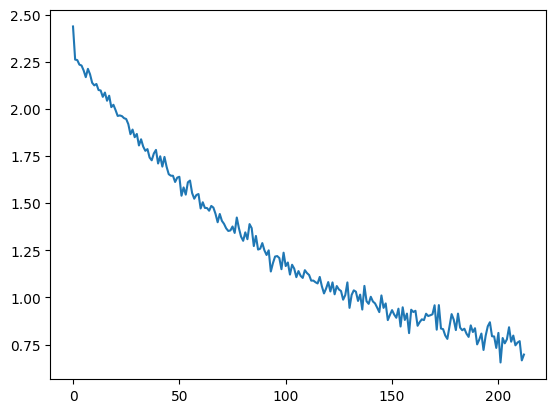

 91%|█████████ | 213/235 [00:52<00:05,  4.13it/s]

Batch 213: Loss = 0.7214, Accuracy = 0.8242


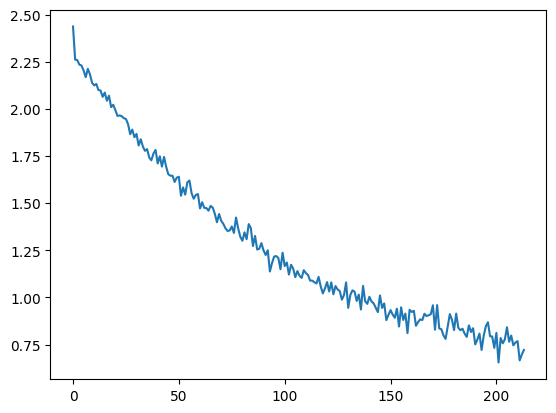

 91%|█████████ | 214/235 [00:52<00:05,  4.15it/s]

Batch 214: Loss = 0.7419, Accuracy = 0.8359


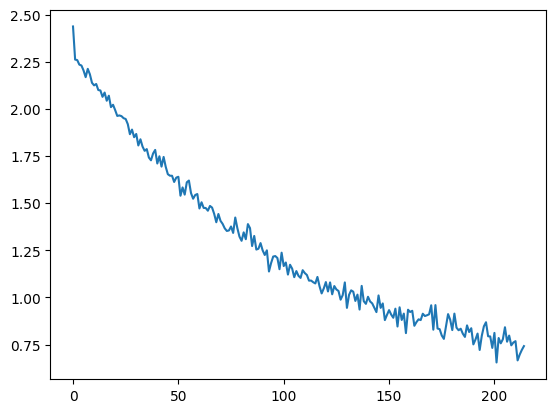

 91%|█████████▏| 215/235 [00:52<00:04,  4.15it/s]

Batch 215: Loss = 0.7174, Accuracy = 0.8516


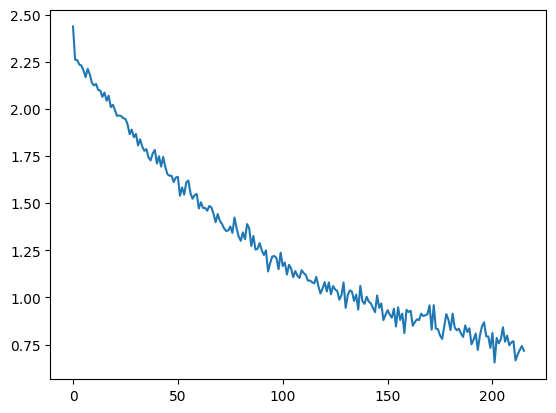

 92%|█████████▏| 216/235 [00:53<00:04,  4.19it/s]

Batch 216: Loss = 0.7061, Accuracy = 0.8516


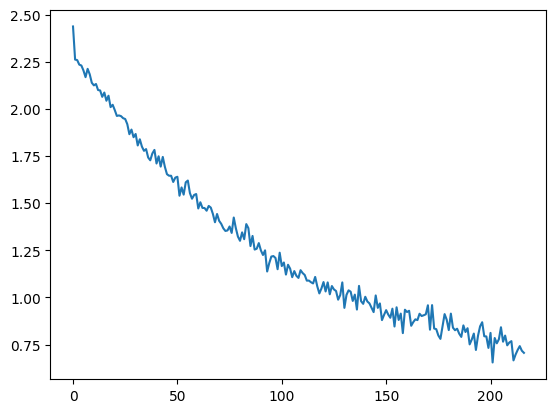

 92%|█████████▏| 217/235 [00:53<00:04,  4.19it/s]

Batch 217: Loss = 0.7746, Accuracy = 0.8633


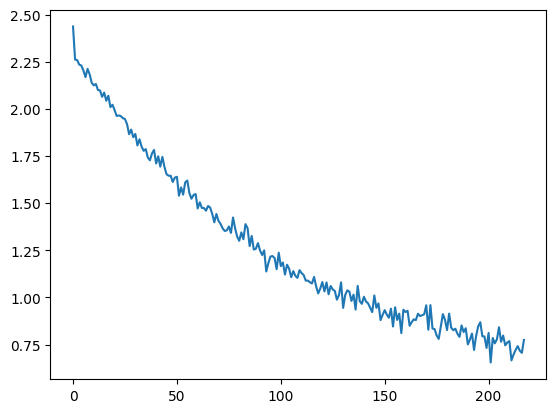

 93%|█████████▎| 218/235 [00:53<00:04,  4.20it/s]

Batch 218: Loss = 0.6997, Accuracy = 0.8867


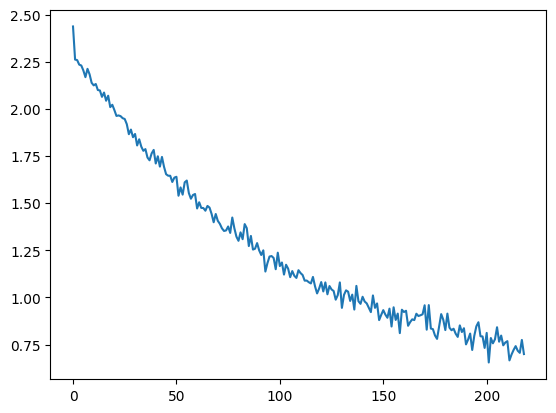

 93%|█████████▎| 219/235 [00:53<00:04,  3.50it/s]

Batch 219: Loss = 0.6796, Accuracy = 0.8438


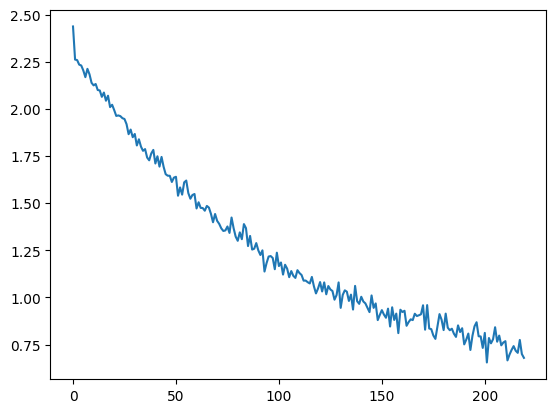

 94%|█████████▎| 220/235 [00:54<00:04,  3.59it/s]

Batch 220: Loss = 0.7072, Accuracy = 0.8398


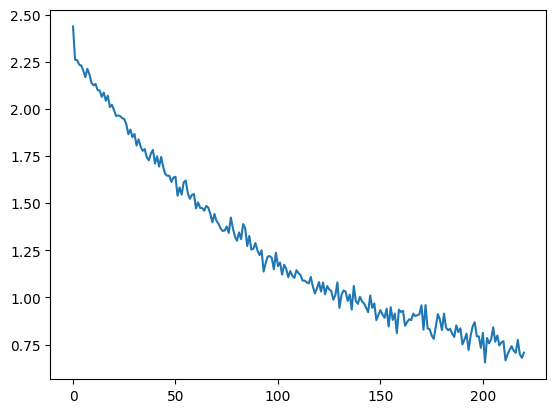

 94%|█████████▍| 221/235 [00:54<00:03,  3.74it/s]

Batch 221: Loss = 0.6796, Accuracy = 0.8633


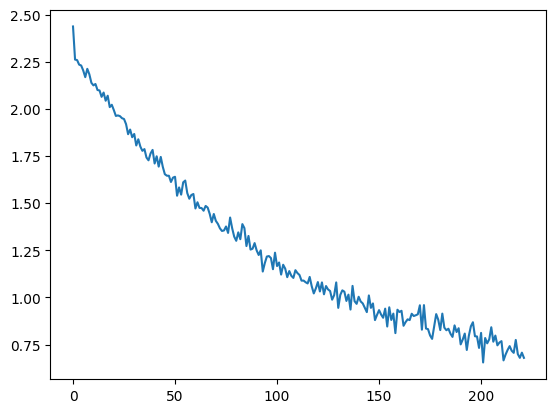

 94%|█████████▍| 222/235 [00:54<00:03,  3.65it/s]

Batch 222: Loss = 0.7650, Accuracy = 0.8281


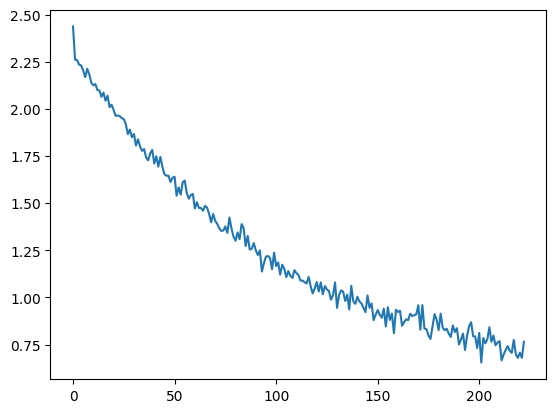

 95%|█████████▍| 223/235 [00:54<00:03,  3.74it/s]

Batch 223: Loss = 0.7177, Accuracy = 0.8711


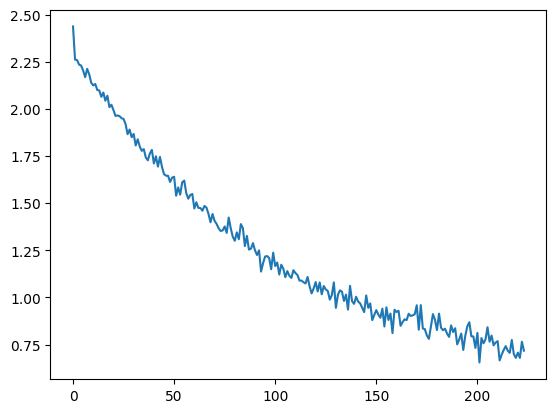

 95%|█████████▌| 224/235 [00:55<00:02,  3.86it/s]

Batch 224: Loss = 0.6787, Accuracy = 0.8750


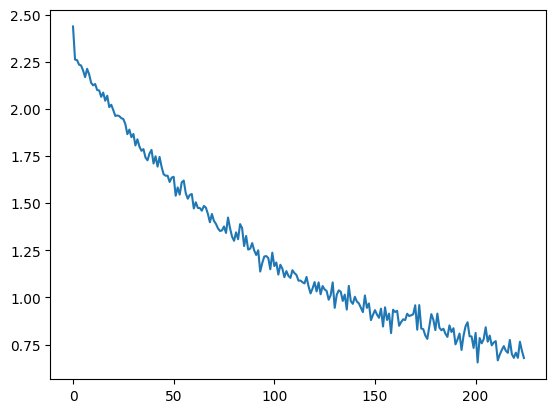

 96%|█████████▌| 225/235 [00:55<00:02,  3.92it/s]

Batch 225: Loss = 0.6857, Accuracy = 0.8672


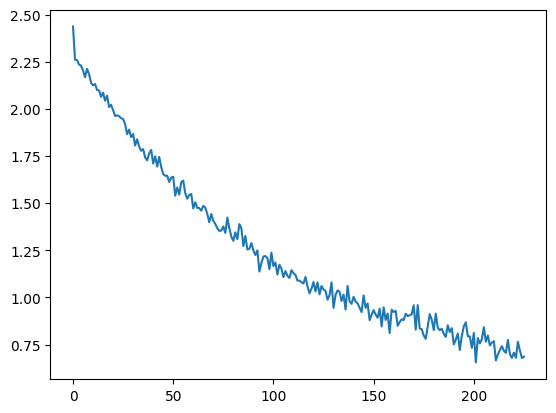

 96%|█████████▌| 226/235 [00:55<00:02,  4.03it/s]

Batch 226: Loss = 0.7906, Accuracy = 0.8164


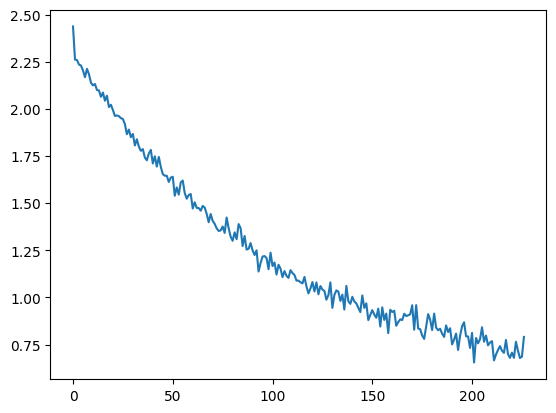

 97%|█████████▋| 227/235 [00:55<00:01,  4.08it/s]

Batch 227: Loss = 0.7009, Accuracy = 0.8672


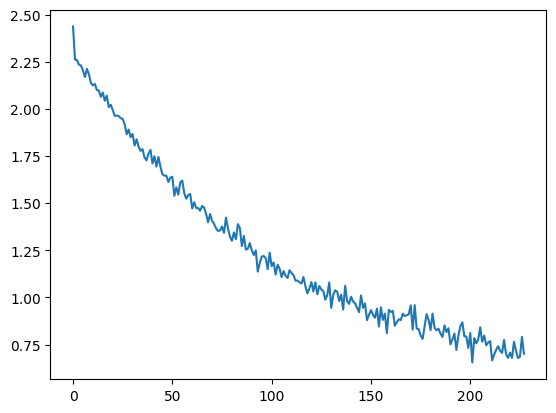

 97%|█████████▋| 228/235 [00:56<00:01,  4.15it/s]

Batch 228: Loss = 0.7402, Accuracy = 0.8086


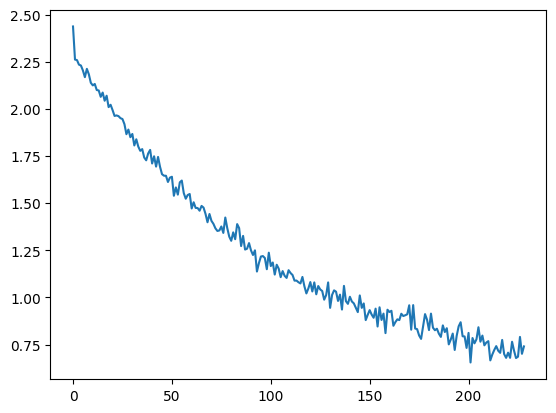

 97%|█████████▋| 229/235 [00:56<00:01,  4.19it/s]

Batch 229: Loss = 0.6974, Accuracy = 0.8633


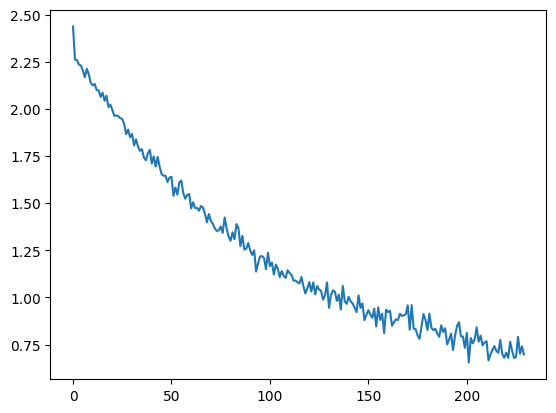

 98%|█████████▊| 230/235 [00:56<00:01,  4.22it/s]

Batch 230: Loss = 0.7537, Accuracy = 0.8086


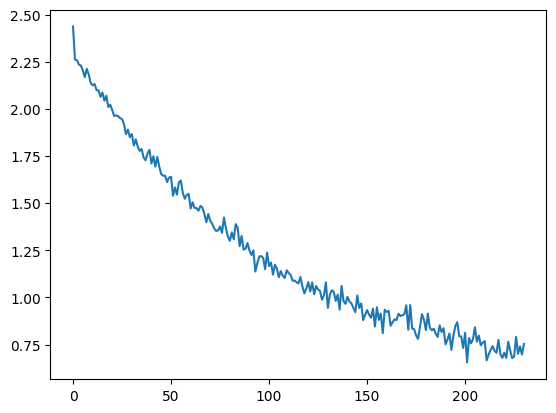

 98%|█████████▊| 231/235 [00:56<00:00,  4.24it/s]

Batch 231: Loss = 0.7345, Accuracy = 0.8125


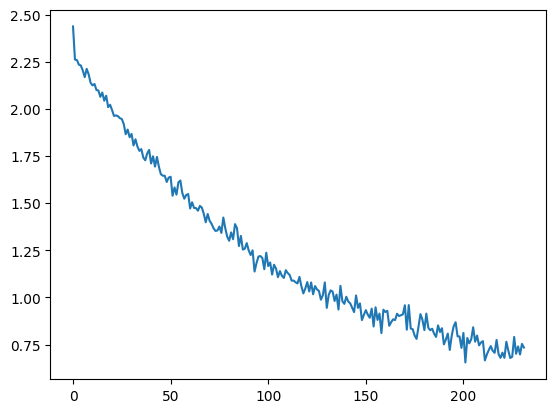

 99%|█████████▊| 232/235 [00:57<00:00,  4.25it/s]

Batch 232: Loss = 0.7190, Accuracy = 0.8164


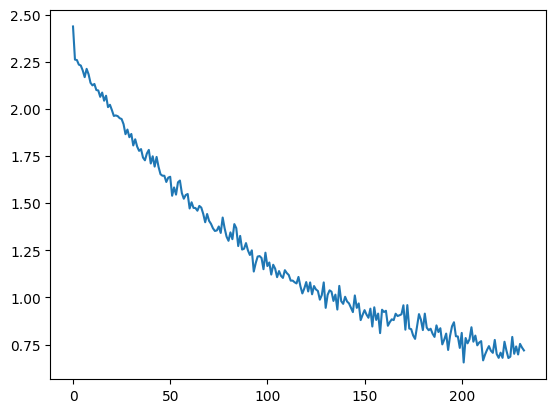

 99%|█████████▉| 233/235 [00:57<00:00,  4.33it/s]

Batch 233: Loss = 0.6841, Accuracy = 0.8438


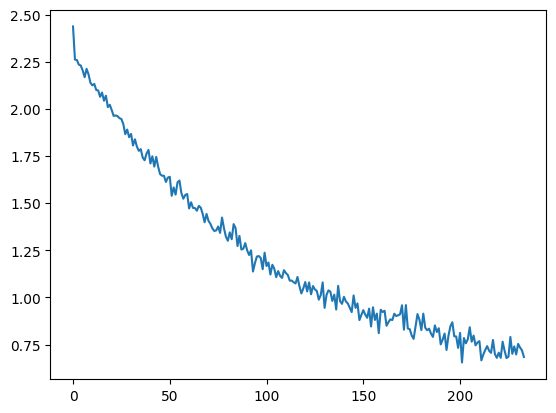

100%|█████████▉| 234/235 [00:57<00:00,  4.32it/s]

Batch 234: Loss = 0.7576, Accuracy = 0.8229


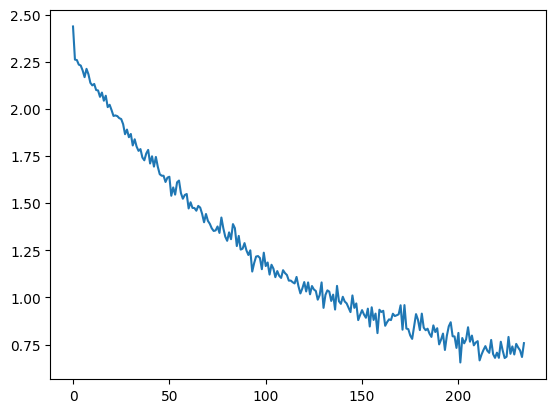

100%|██████████| 235/235 [00:57<00:00,  4.07it/s]


In [15]:
W1, b1, W2, b2 = train(X_train, Y_train, 0.1, 256, 1)

In [16]:
test_accuracy = make_predictions(W1, b1, W2, b2, X_test, Y_test)
print(test_accuracy)

0.8591
